In [1]:
import pandas as pd

from tensorflow import keras
from keras import layers

from modules.utils import(
    train_model, 
    calculate_average_measures, 
    print_testing_loss_accuracy
)

from modules.preprocessing import Preprocessor
from modules.plotting import PlottingManager

In [2]:
def build_tf_idf_model() -> keras.models.Sequential:
    """
    Build and compile a Tf-IDF based model.

    Returns:
    --------
    - model : keras.models.Sequential
        A compiled model that will be trained later.
    """
    
    model = keras.Sequential([
        layers.Input(shape=(10000,)),
        layers.Dropout(0.1),
        layers.BatchNormalization(),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.1),
        layers.BatchNormalization(),
        layers.Dense(200, activation="relu"),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(100, activation="relu"),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(50, activation="tanh"),
        layers.Dropout(0.4),
        layers.BatchNormalization(),
        layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model 

In [3]:
X_train = pd.read_csv("csvs/X_train.csv")
X_train = X_train.iloc[:, 1:]

X_test = pd.read_csv("csvs/X_test.csv")
X_test = X_test.iloc[:, 1:]

y_train = pd.read_csv("csvs/y_train.csv")
y_train = y_train.iloc[:, 1:]

y_test = pd.read_csv("csvs/y_test.csv")
y_test = y_test.iloc[:, 1:]

In [4]:
preprocessor = Preprocessor()
plotter = PlottingManager()

In [5]:
text_vectorizer_1, X_train_vectors_1 = preprocessor.convert_text_to_vectors_tf_idf(X_train["Facts"])

In [6]:
X_test_vectors_1 = preprocessor.convert_text_to_vectors_tf_idf(X_test["Facts"], train=False, text_vectorizer=text_vectorizer_1)

In [7]:
all_models_1, all_losses_1, all_val_losses_1, all_accuracies_1, all_val_accuracies_1 = train_model(build_tf_idf_model, X_train_vectors_1, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 4s 25ms/step - loss: 0.7007 - accuracy: 0.6239 - val_loss: 0.6345 - val_accuracy: 0.6084
Epoch 2/30
33/33 [==============================] - 1s 17ms/step - loss: 0.3391 - accuracy: 0.8644 - val_loss: 0.3273 - val_accuracy: 0.8887
Epoch 3/30
33/33 [==============================] - 1s 16ms/step - loss: 0.1650 - accuracy: 0.9452 - val_loss: 0.2082 - val_accuracy: 0.9436
Epoch 4/30
33/33 [==============================] - 1s 16ms/step - loss: 0.0830 - accuracy: 0.9760 - val_loss: 0.2077 - val_accuracy: 0.9494
Epoch 5/30
33/33 [==============================] - 1s 16ms/step - loss: 0.0559 - accuracy: 0.9841 - val_loss: 0.2027 - val_accuracy: 0.9595
Epoch 6/30
33/33 [==============================] - 1s 16ms/step - loss: 0.0453 - accuracy: 0.9836 - val_loss: 0.2160 - val_accuracy: 0.9566
Epoch 7/30
33/33 [==============================] - 1s 16ms/step - loss: 0.0290 - accuracy: 0.9923 - val_loss: 0.2392 - val_accuracy: 0.9494
Epoch

In [8]:
avg_loss_hist_1, avg_val_loss_hist_1, avg_acc_hist_1, avg_val_acc_hist_1 = calculate_average_measures(all_losses_1, all_val_losses_1, all_accuracies_1, all_val_accuracies_1)

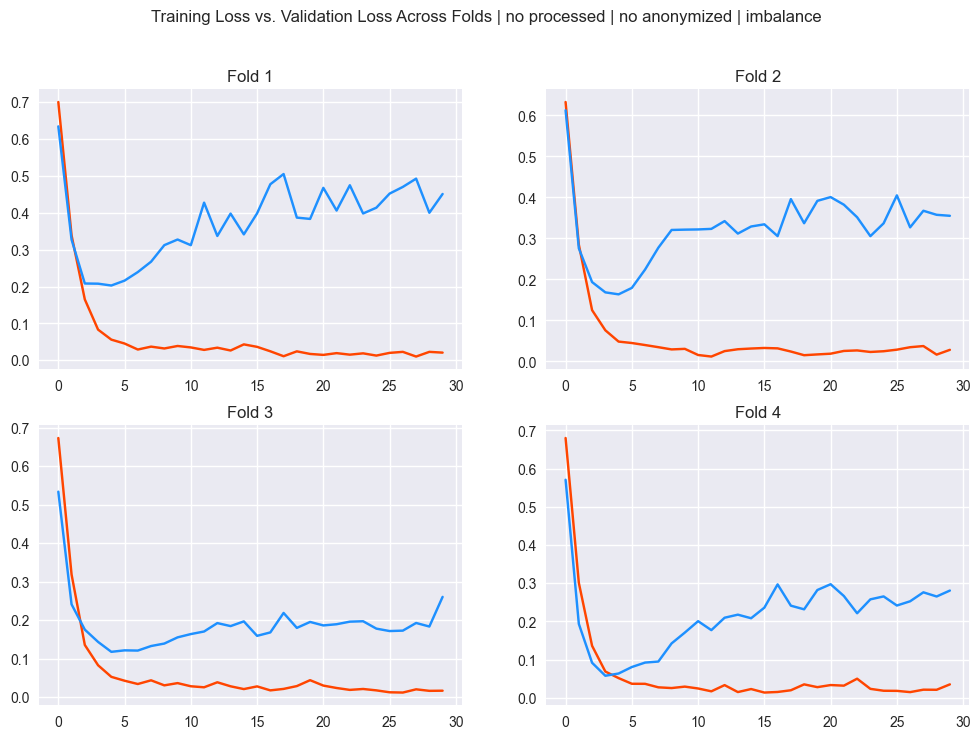

In [9]:
plotter.plot_subplots_curve(all_losses_1, all_val_losses_1, "Training Loss vs. Validation Loss Across Folds | no processed | no anonymized | imbalance ")

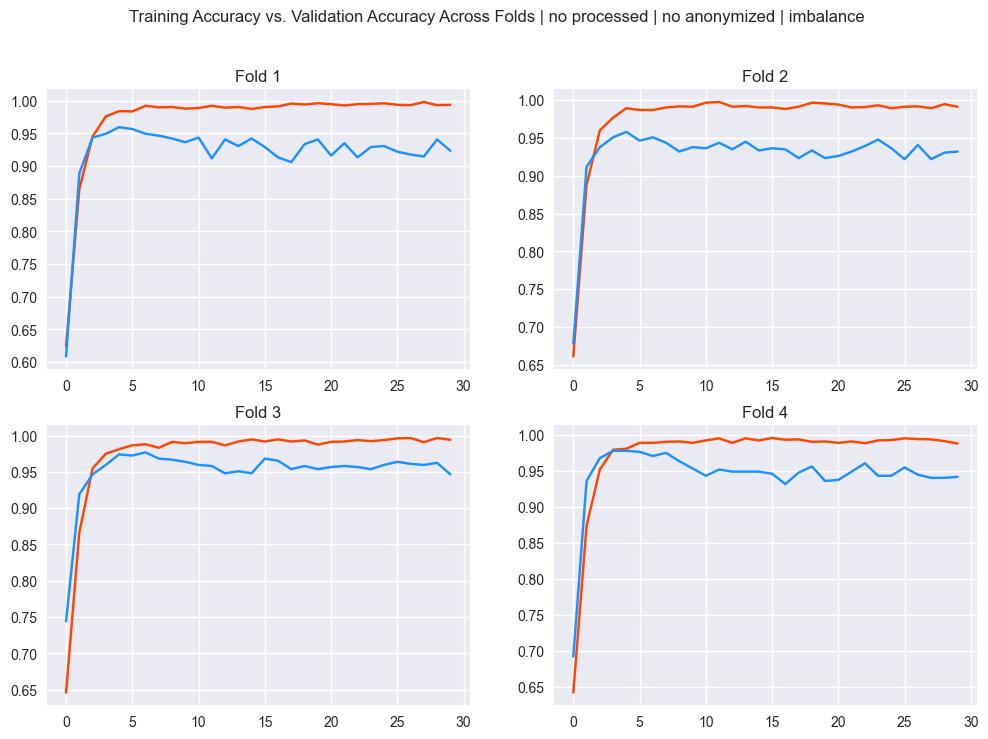

In [10]:
plotter.plot_subplots_curve(all_accuracies_1, all_val_accuracies_1, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | no anonymized | imbalance")

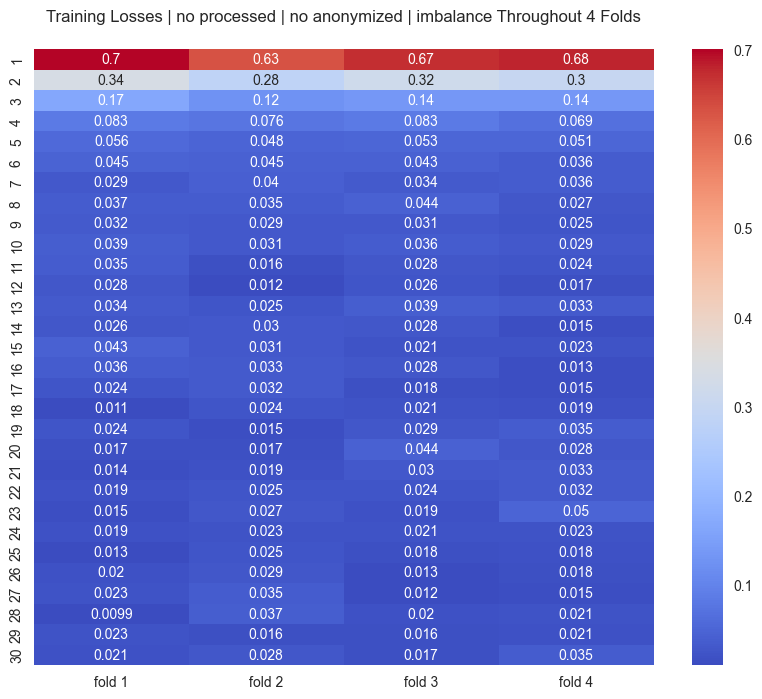

In [11]:
plotter.plot_heatmap(all_losses_1, "Training Losses | no processed | no anonymized | imbalance")

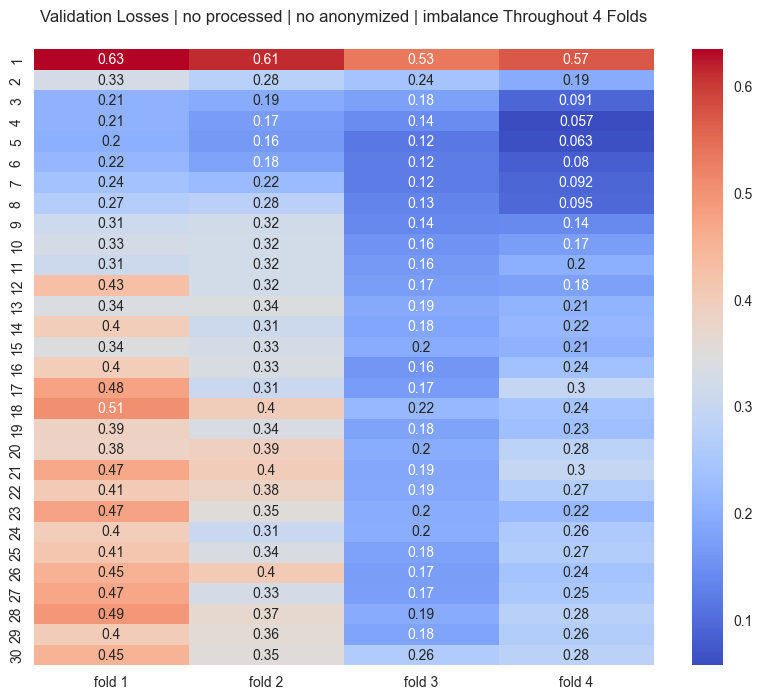

In [12]:
plotter.plot_heatmap(all_val_losses_1, "Validation Losses | no processed | no anonymized | imbalance")

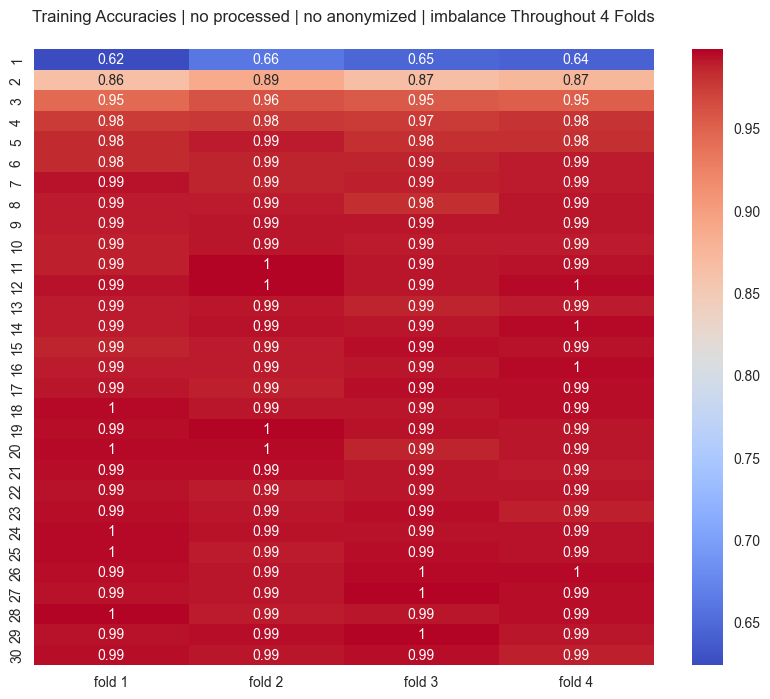

In [13]:
plotter.plot_heatmap(all_accuracies_1, "Training Accuracies | no processed | no anonymized | imbalance")

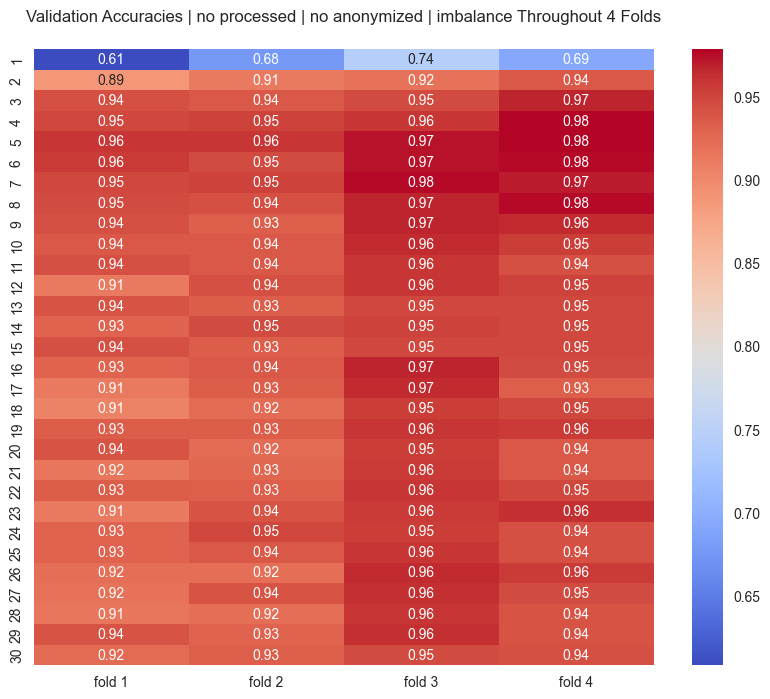

In [14]:
plotter.plot_heatmap(all_val_accuracies_1, "Validation Accuracies | no processed | no anonymized | imbalance")

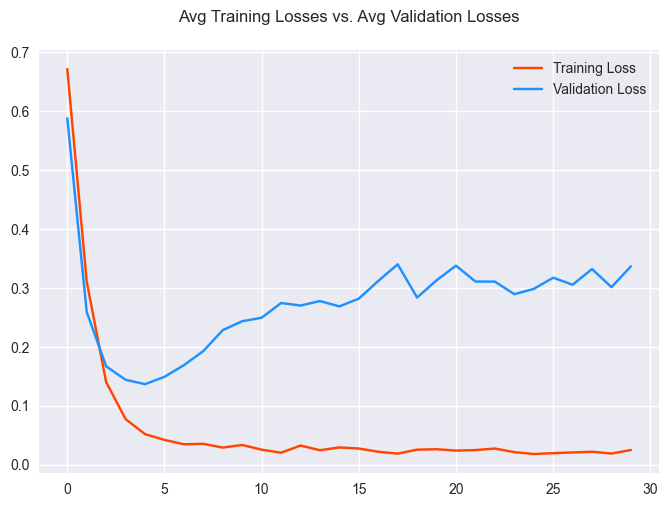

In [15]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_1, avg_val_loss_hist_1, "Training Loss", "Validation Loss")

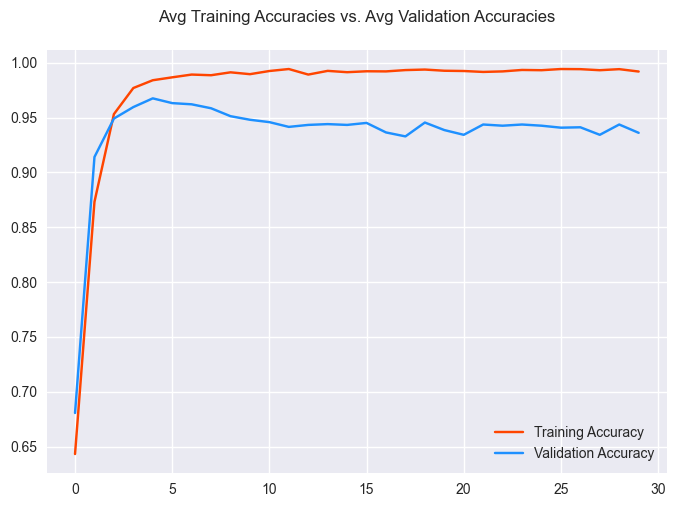

In [16]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_1, avg_val_acc_hist_1, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 1s 8ms/step


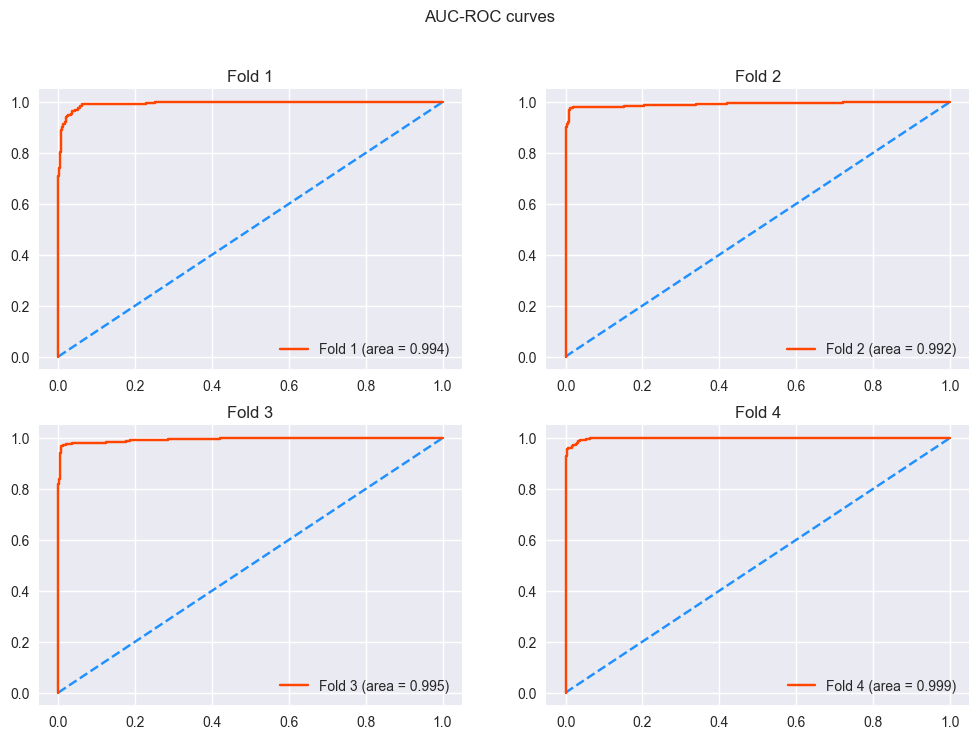

In [17]:
plotter.plot_roc_curve(all_models_1, X_test_vectors_1, y_test)

22/22 [==============================] - 0s 8ms/step


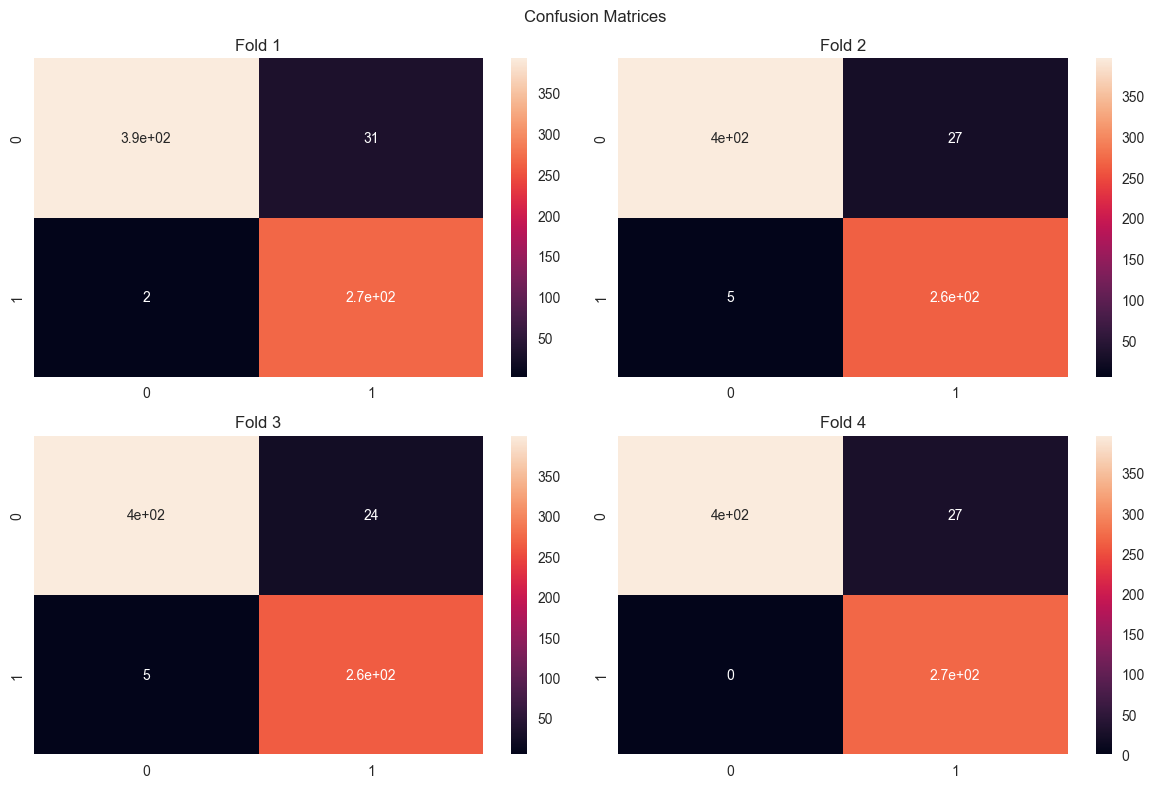

In [18]:
plotter.plot_confusion_matrix(all_models_1, X_test_vectors_1, y_test)

In [19]:
for i, trained_model in enumerate(all_models_1):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_1, y_test))

Model 1:
22/22 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       423
           1       0.90      0.99      0.94       270

    accuracy                           0.95       693
   macro avg       0.95      0.96      0.95       693
weighted avg       0.96      0.95      0.95       693

Model 2:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       423
           1       0.91      0.98      0.94       270

    accuracy                           0.95       693
   macro avg       0.95      0.96      0.95       693
weighted avg       0.96      0.95      0.95       693

Model 3:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       423
           1       0.92      0.98      0.95       2

In [20]:
print_testing_loss_accuracy(all_models_1, X_test_vectors_1, y_test)

model: 1
22/22 [==============================] - 0s 9ms/step - loss: 0.2498 - accuracy: 0.9524
model: 2
22/22 [==============================] - 0s 10ms/step - loss: 0.1910 - accuracy: 0.9538
model: 3
22/22 [==============================] - 0s 8ms/step - loss: 0.2036 - accuracy: 0.9582
model: 4
22/22 [==============================] - 0s 9ms/step - loss: 0.1401 - accuracy: 0.9610
average testing loss: 0.196
average testing accuracy: 0.956


### Combination 2: (No Processing - No Anonymization - Balancing)

In [21]:
balanced_df = preprocessor.balance_data(X_train["Facts"], y_train)
X_train_balanced = balanced_df["Facts"]
y_train_balanced = balanced_df["winner_index"]

In [22]:
text_vectorizer_2, X_train_vectors_2 = preprocessor.convert_text_to_vectors_tf_idf(X_train_balanced)

In [23]:
X_test_vectors_2 = preprocessor.convert_text_to_vectors_tf_idf(X_test["Facts"], train=False, text_vectorizer=text_vectorizer_2)

In [24]:
all_models_2, all_losses_2, all_val_losses_2, all_accuracies_2, all_val_accuracies_2 = train_model(build_tf_idf_model, X_train_vectors_2, y_train_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 15s 90ms/step - loss: 0.5698 - accuracy: 0.6985 - val_loss: 0.5377 - val_accuracy: 0.7290
Epoch 2/30
40/40 [==============================] - 3s 69ms/step - loss: 0.2198 - accuracy: 0.9129 - val_loss: 0.1927 - val_accuracy: 0.9420
Epoch 3/30
40/40 [==============================] - 3s 64ms/step - loss: 0.0817 - accuracy: 0.9764 - val_loss: 0.1208 - val_accuracy: 0.9645
Epoch 4/30
40/40 [==============================] - 3s 72ms/step - loss: 0.0448 - accuracy: 0.9870 - val_loss: 0.1184 - val_accuracy: 0.9669
Epoch 5/30
40/40 [==============================] - 3s 63ms/step - loss: 0.0392 - accuracy: 0.9905 - val_loss: 0.1323 - val_accuracy: 0.9680
Epoch 6/30
40/40 [==============================] - 2s 62ms/step - loss: 0.0307 - accuracy: 0.9894 - val_loss: 0.1355 - val_accuracy: 0.9680
Epoch 7/30
40/40 [==============================] - 2s 61ms/step - loss: 0.0309 - accuracy: 0.9917 - val_loss: 0.1769 - val_accuracy: 0.9550
Epoc

In [25]:
avg_loss_hist_2, avg_val_loss_hist_2, avg_acc_hist_2, avg_val_acc_hist_2 = calculate_average_measures(all_losses_2, all_val_losses_2, all_accuracies_2, all_val_accuracies_2)

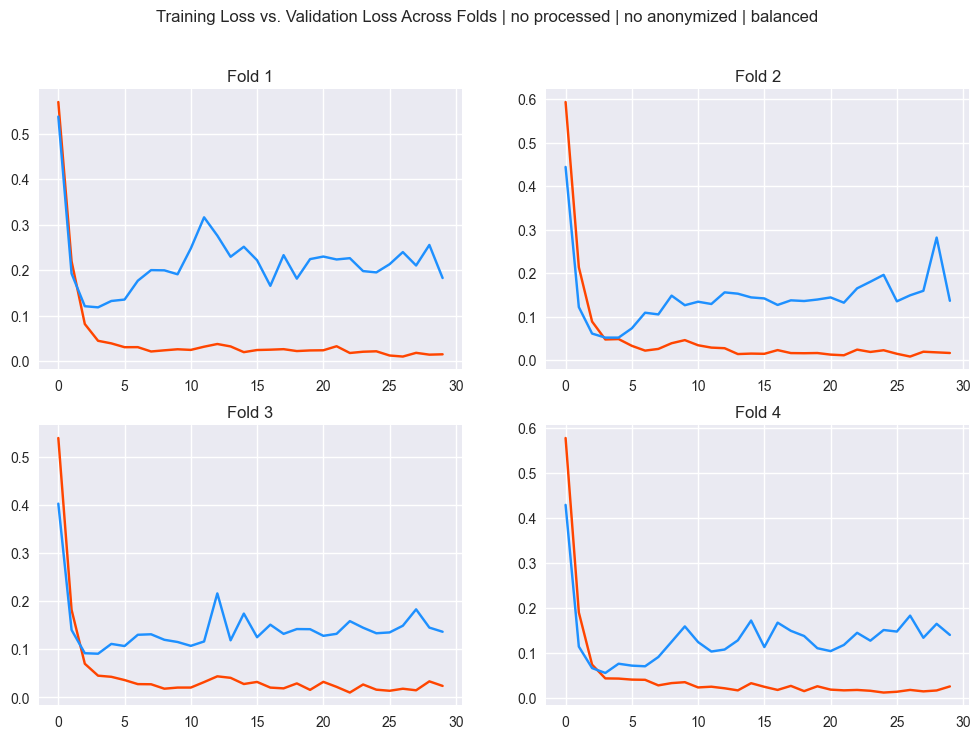

In [26]:
plotter.plot_subplots_curve(all_losses_2, all_val_losses_2, "Training Loss vs. Validation Loss Across Folds | no processed | no anonymized | balanced ")

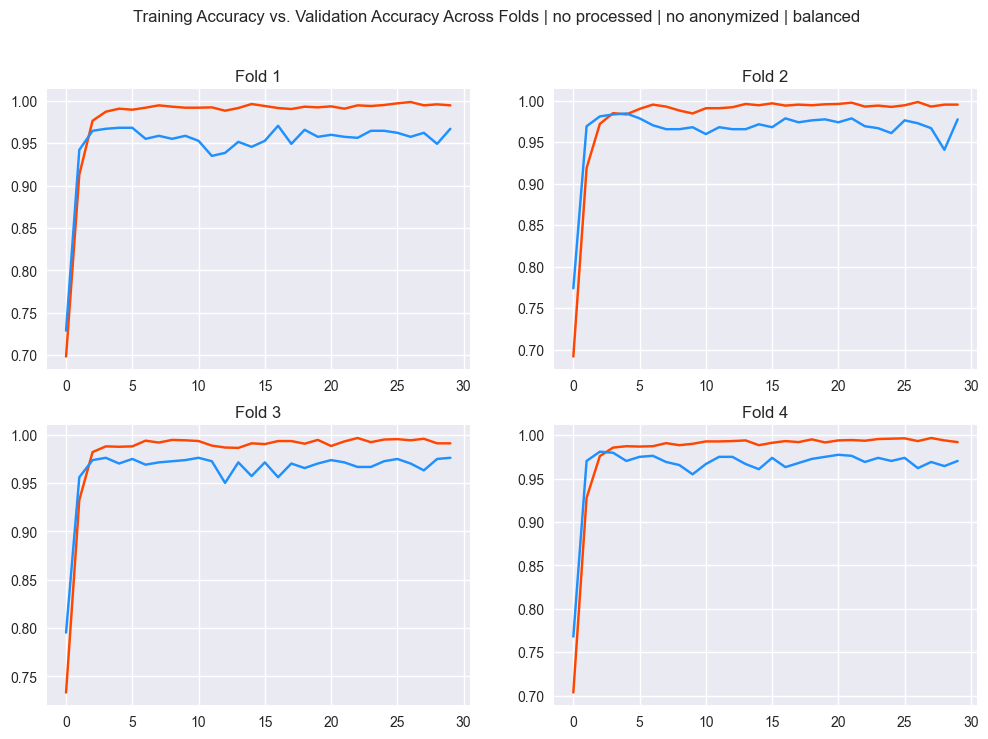

In [27]:
plotter.plot_subplots_curve(all_accuracies_2, all_val_accuracies_2, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | no anonymized | balanced")

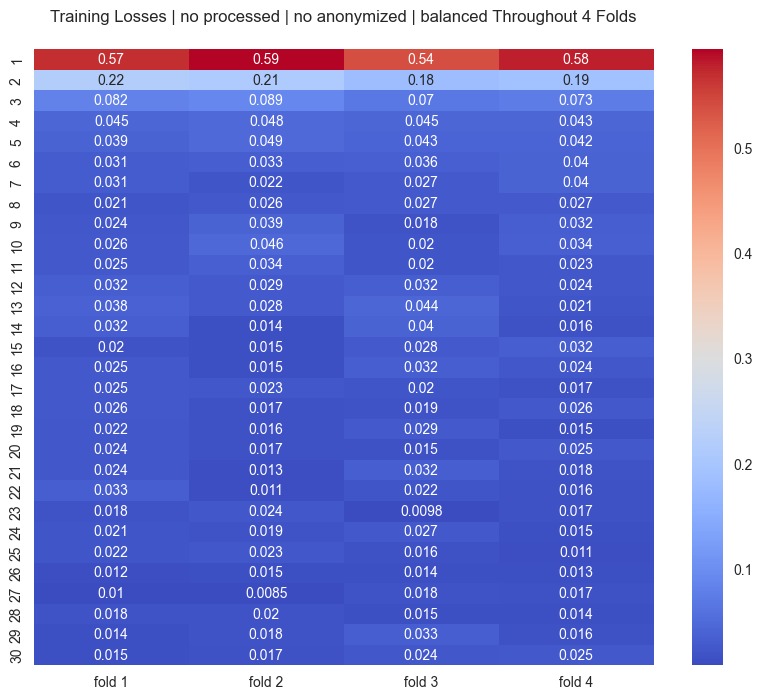

In [28]:
plotter.plot_heatmap(all_losses_2, "Training Losses | no processed | no anonymized | balanced")

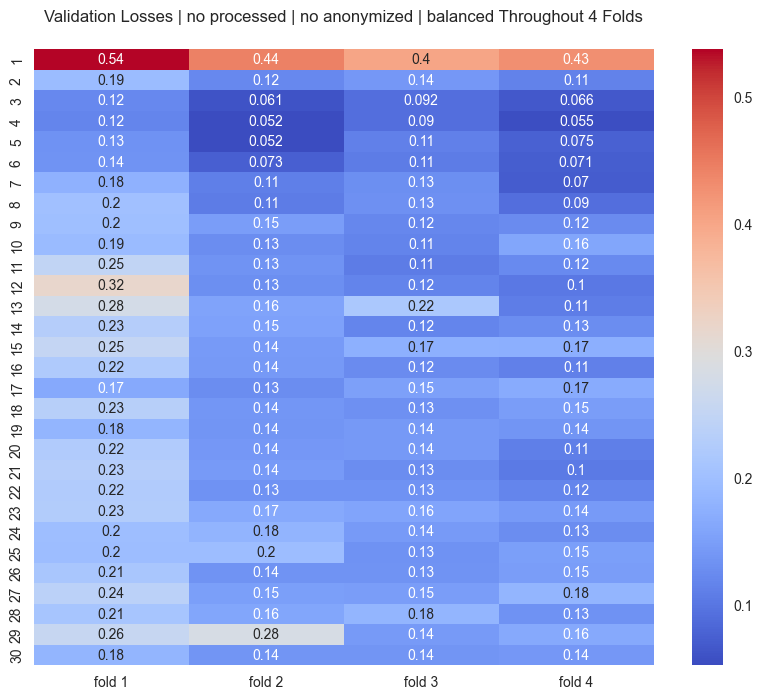

In [29]:
plotter.plot_heatmap(all_val_losses_2, "Validation Losses | no processed | no anonymized | balanced")

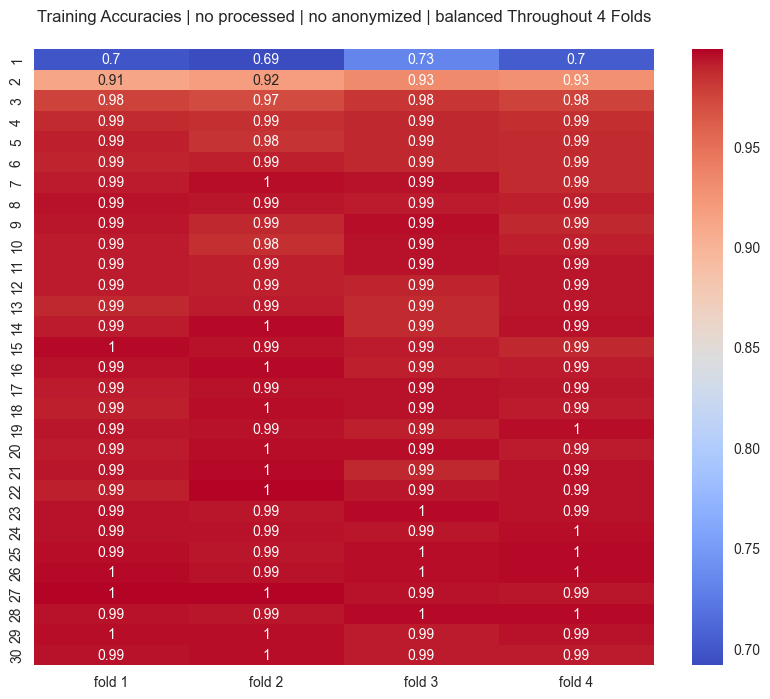

In [30]:
plotter.plot_heatmap(all_accuracies_2, "Training Accuracies | no processed | no anonymized | balanced")

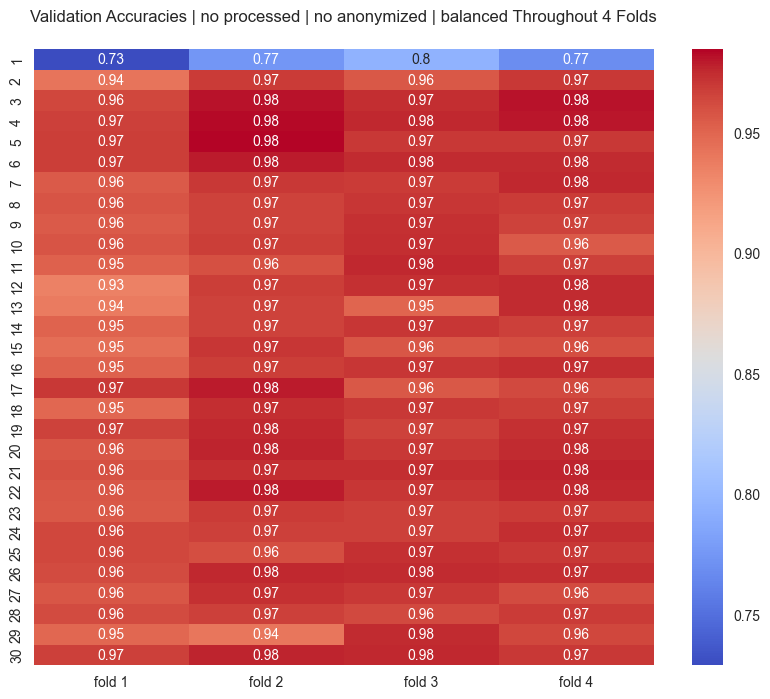

In [31]:
plotter.plot_heatmap(all_val_accuracies_2, "Validation Accuracies | no processed | no anonymized | balanced")

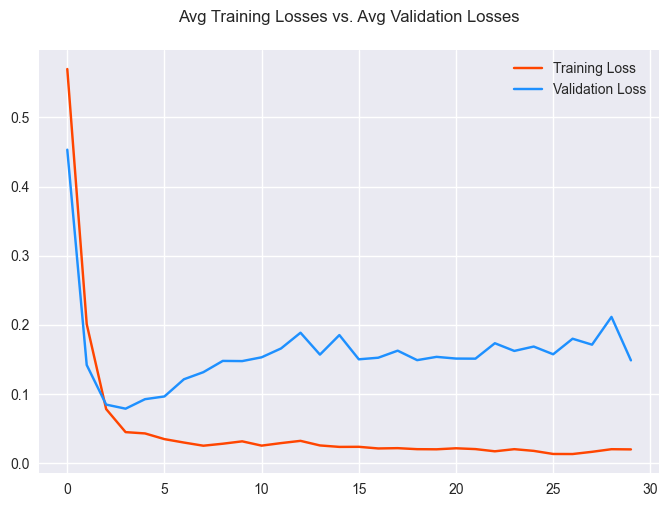

In [32]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_2, avg_val_loss_hist_2, "Training Loss", "Validation Loss")

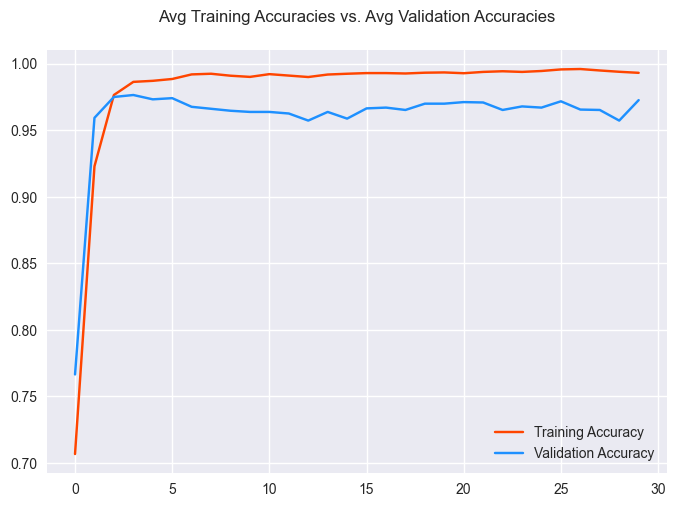

In [33]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_2, avg_val_acc_hist_2, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 1s 8ms/step


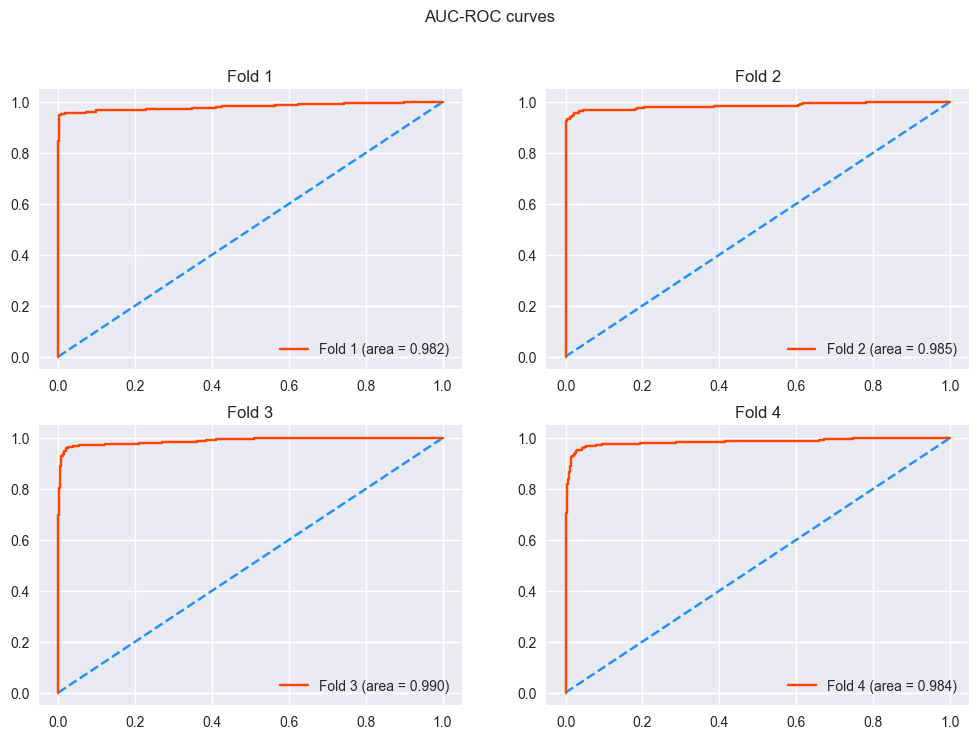

In [34]:
plotter.plot_roc_curve(all_models_2, X_test_vectors_2, y_test)

22/22 [==============================] - 0s 8ms/step


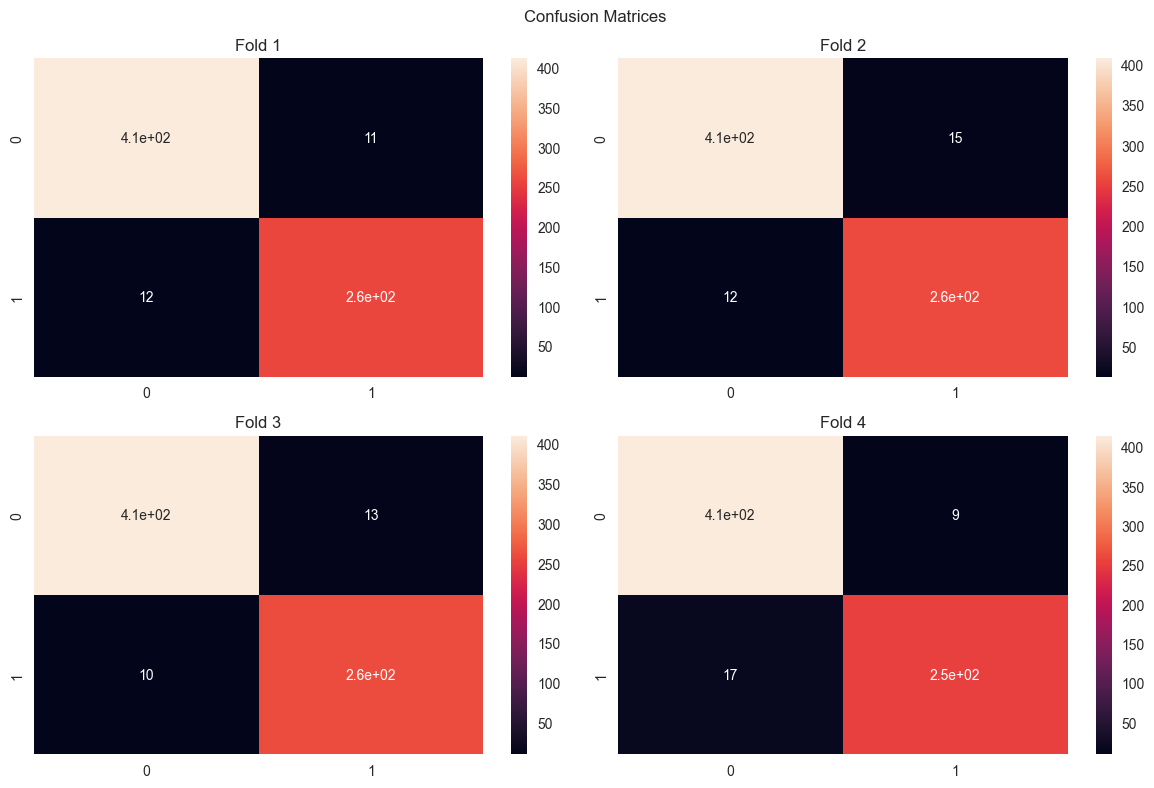

In [35]:
plotter.plot_confusion_matrix(all_models_2, X_test_vectors_2, y_test)

In [36]:
for i, trained_model in enumerate(all_models_2):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_2, y_test))

Model 1:
22/22 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       423
           1       0.96      0.96      0.96       270

    accuracy                           0.97       693
   macro avg       0.97      0.96      0.97       693
weighted avg       0.97      0.97      0.97       693

Model 2:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       423
           1       0.95      0.96      0.95       270

    accuracy                           0.96       693
   macro avg       0.96      0.96      0.96       693
weighted avg       0.96      0.96      0.96       693

Model 3:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       423
           1       0.95      0.96      0.96       

In [37]:
print_testing_loss_accuracy(all_models_2, X_test_vectors_2, y_test)

model: 1
22/22 [==============================] - 0s 9ms/step - loss: 0.2022 - accuracy: 0.9668
model: 2
22/22 [==============================] - 0s 8ms/step - loss: 0.2122 - accuracy: 0.9610
model: 3
22/22 [==============================] - 0s 9ms/step - loss: 0.1616 - accuracy: 0.9668
model: 4
22/22 [==============================] - 0s 9ms/step - loss: 0.2190 - accuracy: 0.9625
average testing loss: 0.199
average testing accuracy: 0.964


### Combination 3: (No Processing - Anonymization - Imbalancing)

In [38]:
first_party_names_3 = X_train["first_party"]
second_party_names_3 = X_train["second_party"]
facts_3 = X_train["Facts"]

In [39]:
test_first_party_names_3 = X_test["first_party"]
test_second_party_names_3 = X_test["second_party"]
test_facts_3 = X_test["Facts"]

In [40]:
anonymized_facts_3 = preprocessor.anonymize_data(first_party_names_3, second_party_names_3, facts_3)
test_anonymized_facts_3 = preprocessor.anonymize_data(test_first_party_names_3, test_second_party_names_3, test_facts_3)

In [41]:
text_vectorizer_3, X_train_vectors_3 = preprocessor.convert_text_to_vectors_tf_idf(anonymized_facts_3)

In [42]:
X_test_vectors_3 = preprocessor.convert_text_to_vectors_tf_idf(test_anonymized_facts_3, train=False, text_vectorizer=text_vectorizer_3)

In [43]:
all_models_3, all_losses_3, all_val_losses_3, all_accuracies_3, all_val_accuracies_3 = train_model(build_tf_idf_model, X_train_vectors_3, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 13s 84ms/step - loss: 0.6946 - accuracy: 0.6277 - val_loss: 0.5831 - val_accuracy: 0.6965
Epoch 2/30
33/33 [==============================] - 2s 64ms/step - loss: 0.3935 - accuracy: 0.8307 - val_loss: 0.2636 - val_accuracy: 0.9090
Epoch 3/30
33/33 [==============================] - 2s 57ms/step - loss: 0.1712 - accuracy: 0.9394 - val_loss: 0.1393 - val_accuracy: 0.9451
Epoch 4/30
33/33 [==============================] - 2s 55ms/step - loss: 0.0754 - accuracy: 0.9793 - val_loss: 0.1193 - val_accuracy: 0.9624
Epoch 5/30
33/33 [==============================] - 2s 56ms/step - loss: 0.0569 - accuracy: 0.9822 - val_loss: 0.0925 - val_accuracy: 0.9725
Epoch 6/30
33/33 [==============================] - 2s 54ms/step - loss: 0.0347 - accuracy: 0.9913 - val_loss: 0.1214 - val_accuracy: 0.9668
Epoch 7/30
33/33 [==============================] - 2s 55ms/step - loss: 0.0284 - accuracy: 0.9942 - val_loss: 0.1405 - val_accuracy: 0.9653
Epoc

In [44]:
avg_loss_hist_3, avg_val_loss_hist_3, avg_acc_hist_3, avg_val_acc_hist_3 = calculate_average_measures(all_losses_3, all_val_losses_3, all_accuracies_3, all_val_accuracies_3)

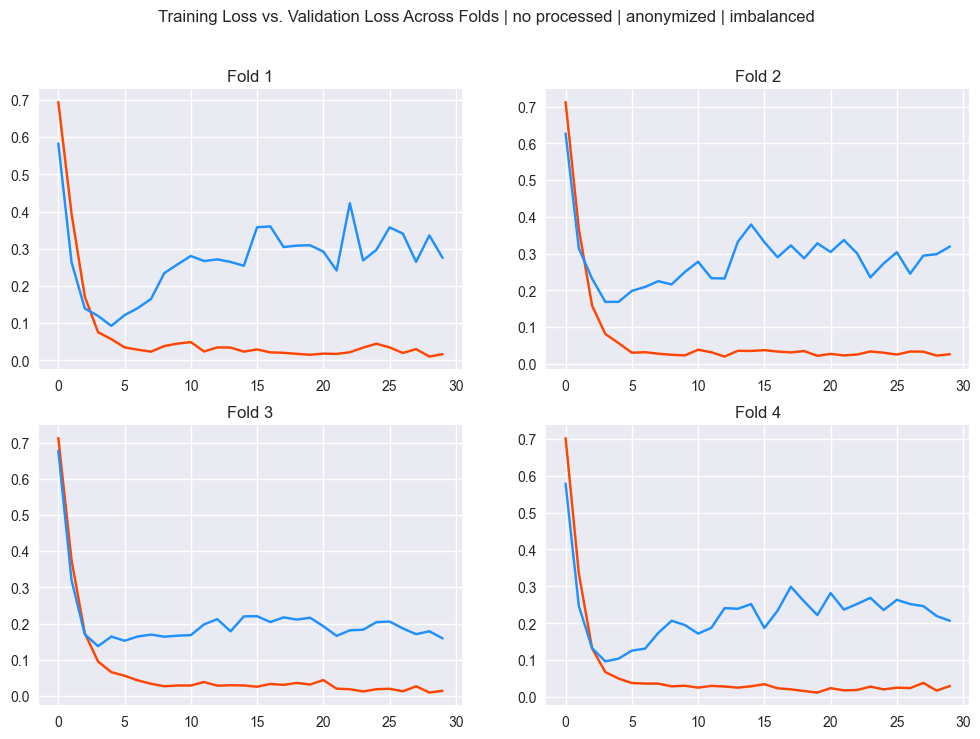

In [45]:
plotter.plot_subplots_curve(all_losses_3, all_val_losses_3, "Training Loss vs. Validation Loss Across Folds | no processed | anonymized | imbalanced ")

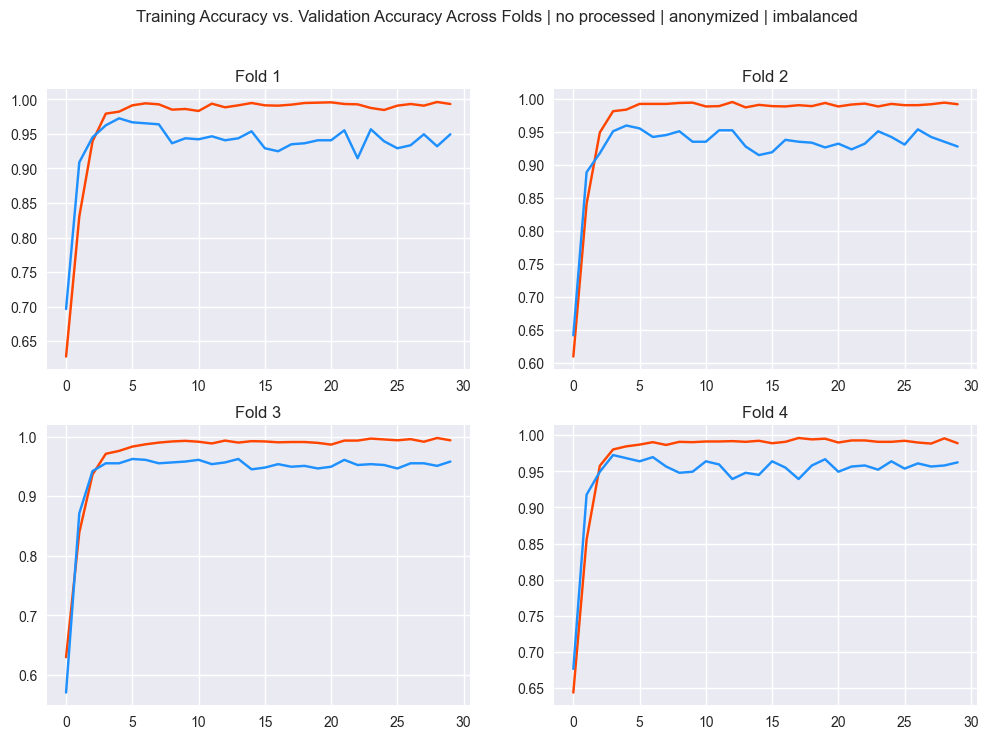

In [46]:
plotter.plot_subplots_curve(all_accuracies_3, all_val_accuracies_3, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | anonymized | imbalanced")

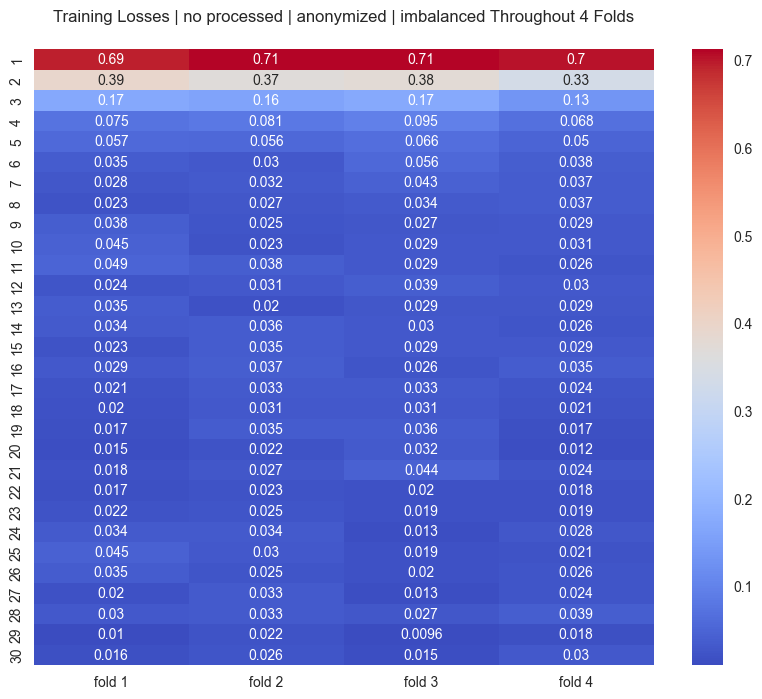

In [47]:
plotter.plot_heatmap(all_losses_3, "Training Losses | no processed | anonymized | imbalanced")

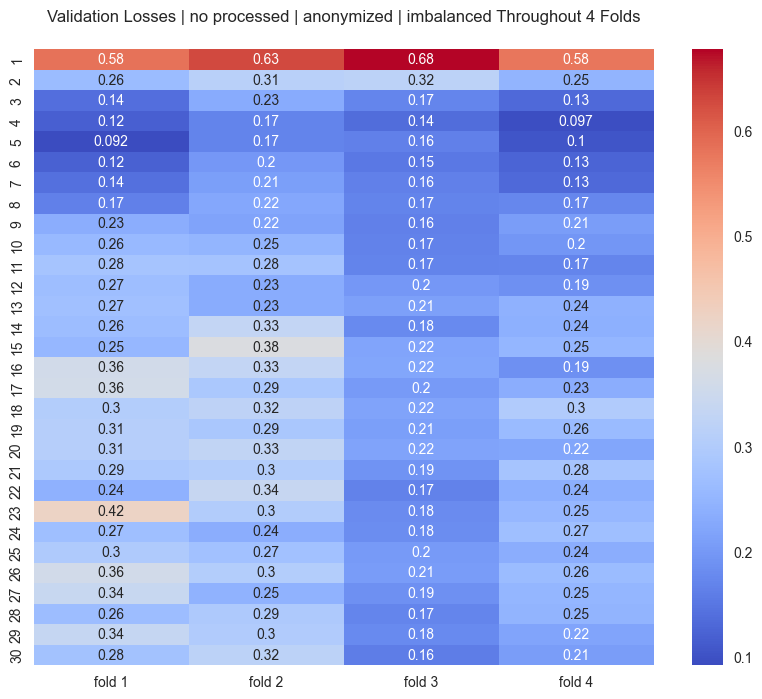

In [48]:
plotter.plot_heatmap(all_val_losses_3, "Validation Losses | no processed | anonymized | imbalanced")

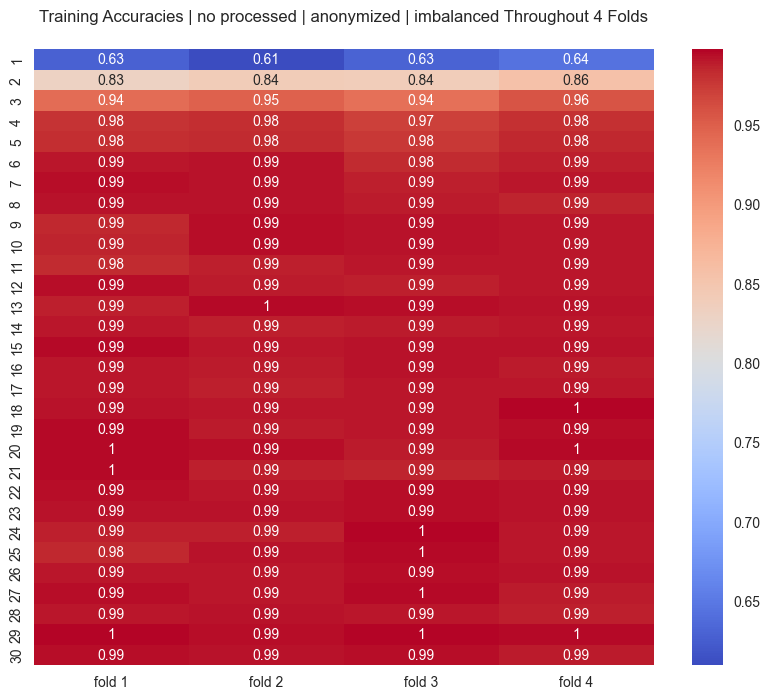

In [49]:
plotter.plot_heatmap(all_accuracies_3, "Training Accuracies | no processed | anonymized | imbalanced")

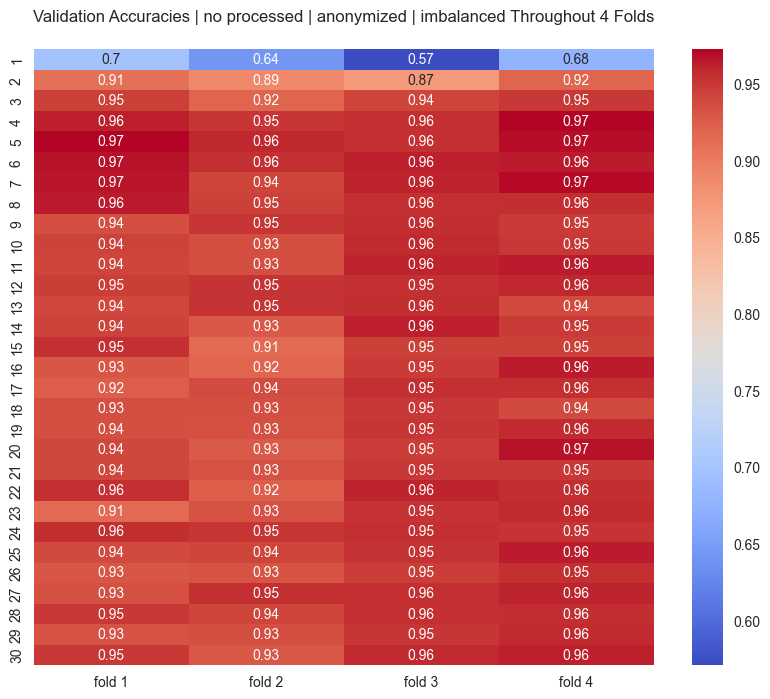

In [50]:
plotter.plot_heatmap(all_val_accuracies_3, "Validation Accuracies | no processed | anonymized | imbalanced")

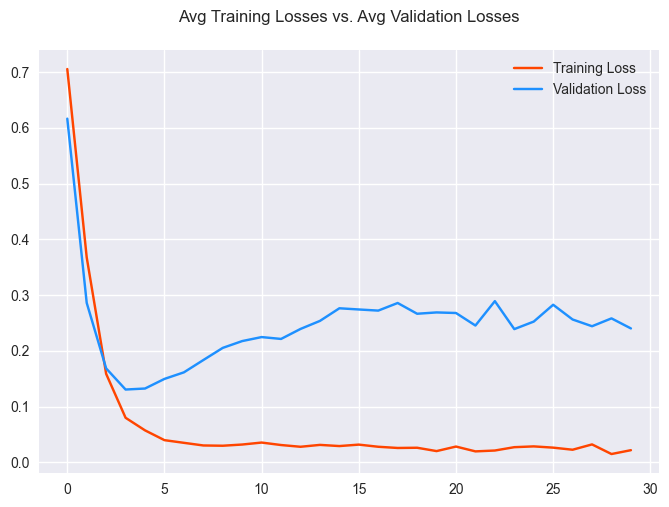

In [51]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_3, avg_val_loss_hist_3, "Training Loss", "Validation Loss")

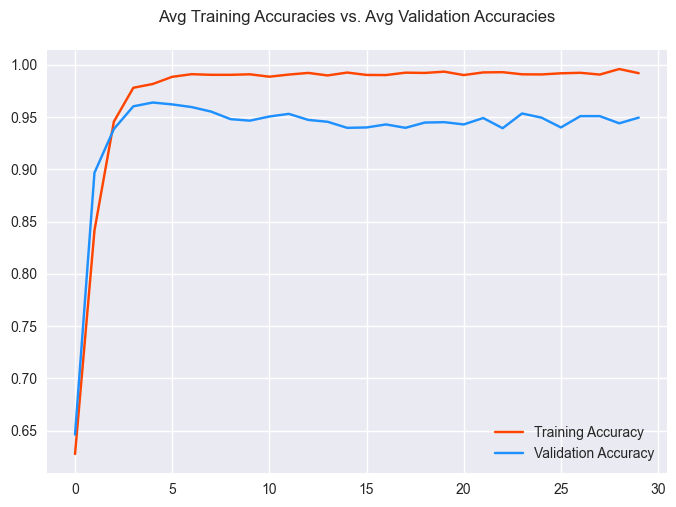

In [52]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_3, avg_val_acc_hist_3, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 1s 8ms/step


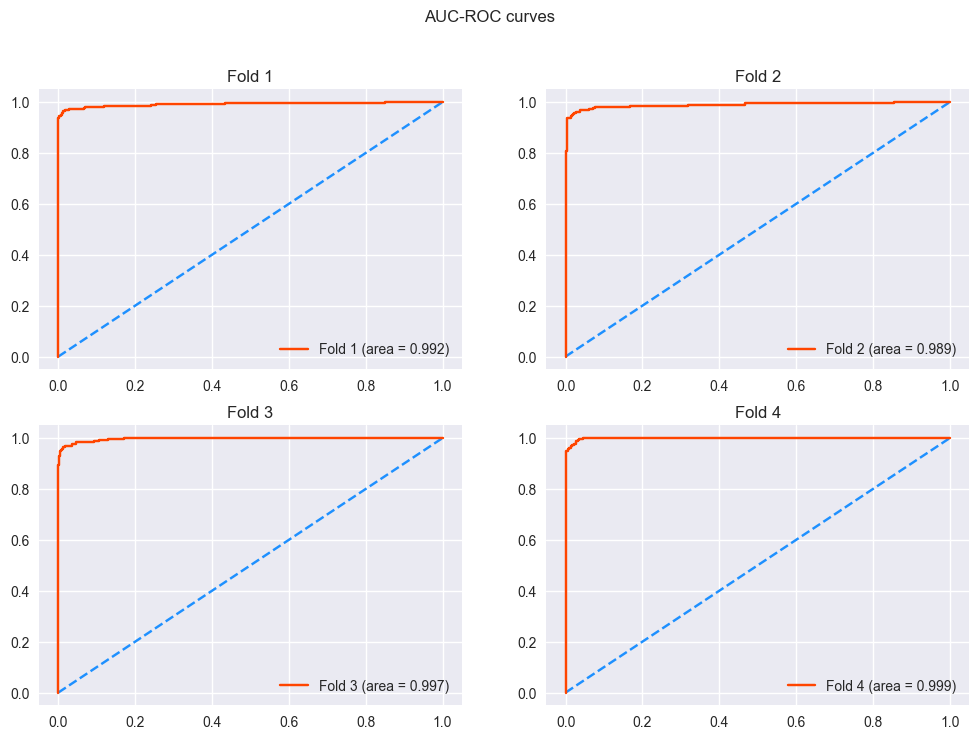

In [53]:
plotter.plot_roc_curve(all_models_3, X_test_vectors_3, y_test)

22/22 [==============================] - 0s 7ms/step


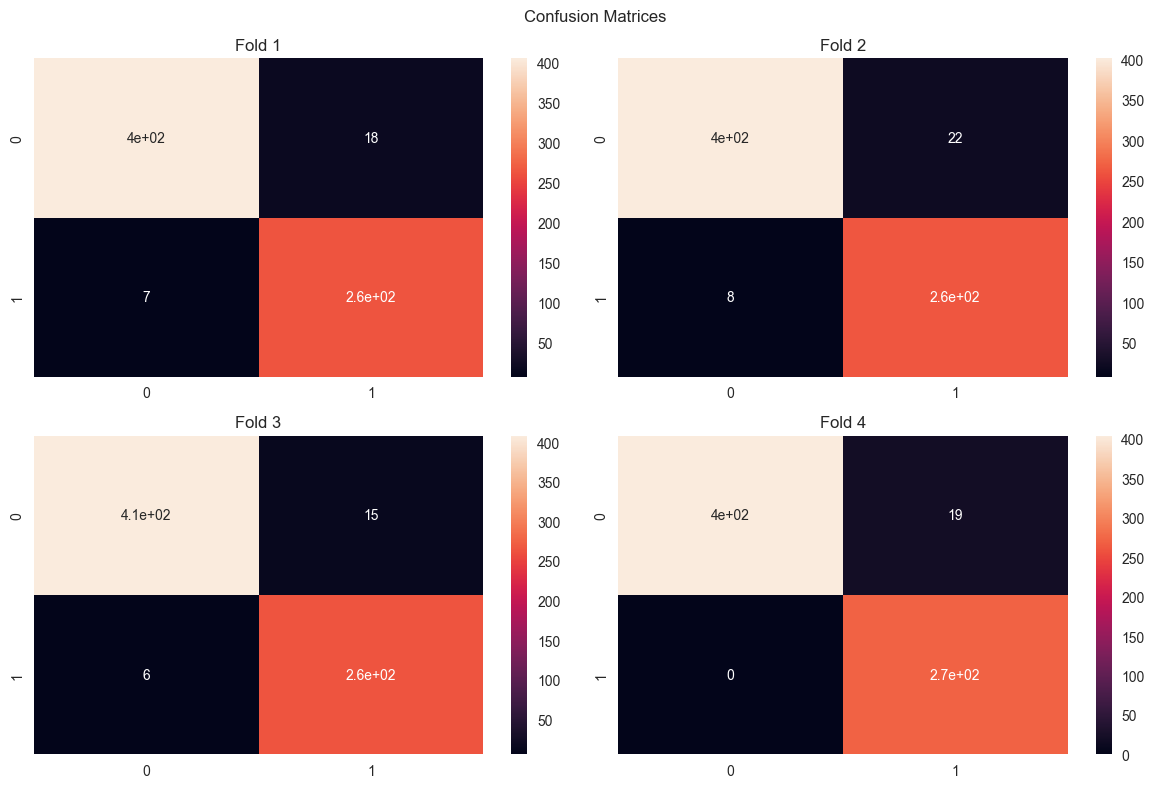

In [54]:
plotter.plot_confusion_matrix(all_models_3, X_test_vectors_3, y_test)

In [55]:
for i, trained_model in enumerate(all_models_3):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_3, y_test))

Model 1:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       423
           1       0.94      0.97      0.95       270

    accuracy                           0.96       693
   macro avg       0.96      0.97      0.96       693
weighted avg       0.96      0.96      0.96       693

Model 2:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       423
           1       0.92      0.97      0.95       270

    accuracy                           0.96       693
   macro avg       0.95      0.96      0.95       693
weighted avg       0.96      0.96      0.96       693

Model 3:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       423
           1       0.95      0.98      0.96       2

In [56]:
print_testing_loss_accuracy(all_models_3, X_test_vectors_3, y_test)

model: 1
22/22 [==============================] - 0s 9ms/step - loss: 0.1608 - accuracy: 0.9639
model: 2
22/22 [==============================] - 0s 9ms/step - loss: 0.1989 - accuracy: 0.9567
model: 3
22/22 [==============================] - 0s 9ms/step - loss: 0.1258 - accuracy: 0.9697
model: 4
22/22 [==============================] - 0s 9ms/step - loss: 0.1417 - accuracy: 0.9726
average testing loss: 0.157
average testing accuracy: 0.966


### Combination 4: (No Processing - Anonymization - Balancing)

In [57]:
first_party_names_4 = X_train["first_party"]
second_party_names_4 = X_train["second_party"]
facts_4 = X_train["Facts"]

In [58]:
test_first_party_names_4 = X_test["first_party"]
test_second_party_names_4 = X_test["second_party"]
test_facts_4 = X_test["Facts"]

In [59]:
anonymized_facts_4 = preprocessor.anonymize_data(first_party_names_4, second_party_names_4, facts_4)
test_anonymized_facts_4 = preprocessor.anonymize_data(test_first_party_names_4, test_second_party_names_4, test_facts_4)

In [60]:
balanced_anonymized_df = preprocessor.balance_data(anonymized_facts_4, y_train)
balanced_anonymized_df = balanced_anonymized_df.rename(columns={0: "Facts"})
balanced_anonymized_df.head()

Facts  winner_index
2512   _PARTY_ , a citizen of Albania, entered the U...             0
2660   _PARTY_ . _PARTY_ hired the law firm of _PA _...             1
1838   _PARTY_ among several other defendants were i...             1
1695  During the 2009 Working Families Party primary...             0
382   On the night of June 16, 1962, a man later ide...             0

In [61]:
X_train_balanced_anonymized = balanced_anonymized_df["Facts"]
y_train_balanced_anonymized = balanced_anonymized_df["winner_index"]

In [62]:
text_vectorizer_4, X_train_vectors_4 = preprocessor.convert_text_to_vectors_tf_idf(X_train_balanced_anonymized)

In [63]:
X_test_vectors_4 = preprocessor.convert_text_to_vectors_tf_idf(test_anonymized_facts_4, train=False, text_vectorizer=text_vectorizer_4)

In [64]:
all_models_4, all_losses_4, all_val_losses_4, all_accuracies_4, all_val_accuracies_4 = train_model(build_tf_idf_model, X_train_vectors_4, y_train_balanced_anonymized)

fold: 1
Epoch 1/30
40/40 [==============================] - 14s 75ms/step - loss: 0.5611 - accuracy: 0.7146 - val_loss: 0.4613 - val_accuracy: 0.7645
Epoch 2/30
40/40 [==============================] - 2s 55ms/step - loss: 0.1854 - accuracy: 0.9381 - val_loss: 0.1525 - val_accuracy: 0.9432
Epoch 3/30
40/40 [==============================] - 2s 53ms/step - loss: 0.0766 - accuracy: 0.9779 - val_loss: 0.0899 - val_accuracy: 0.9669
Epoch 4/30
40/40 [==============================] - 2s 51ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.0714 - val_accuracy: 0.9704
Epoch 5/30
40/40 [==============================] - 2s 56ms/step - loss: 0.0420 - accuracy: 0.9858 - val_loss: 0.0593 - val_accuracy: 0.9763
Epoch 6/30
40/40 [==============================] - 2s 53ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0825 - val_accuracy: 0.9704
Epoch 7/30
40/40 [==============================] - 2s 51ms/step - loss: 0.0322 - accuracy: 0.9890 - val_loss: 0.0949 - val_accuracy: 0.9728
Epoc

In [65]:
avg_loss_hist_4, avg_val_loss_hist_4, avg_acc_hist_4, avg_val_acc_hist_4 = calculate_average_measures(all_losses_4, all_val_losses_4, all_accuracies_4, all_val_accuracies_4)

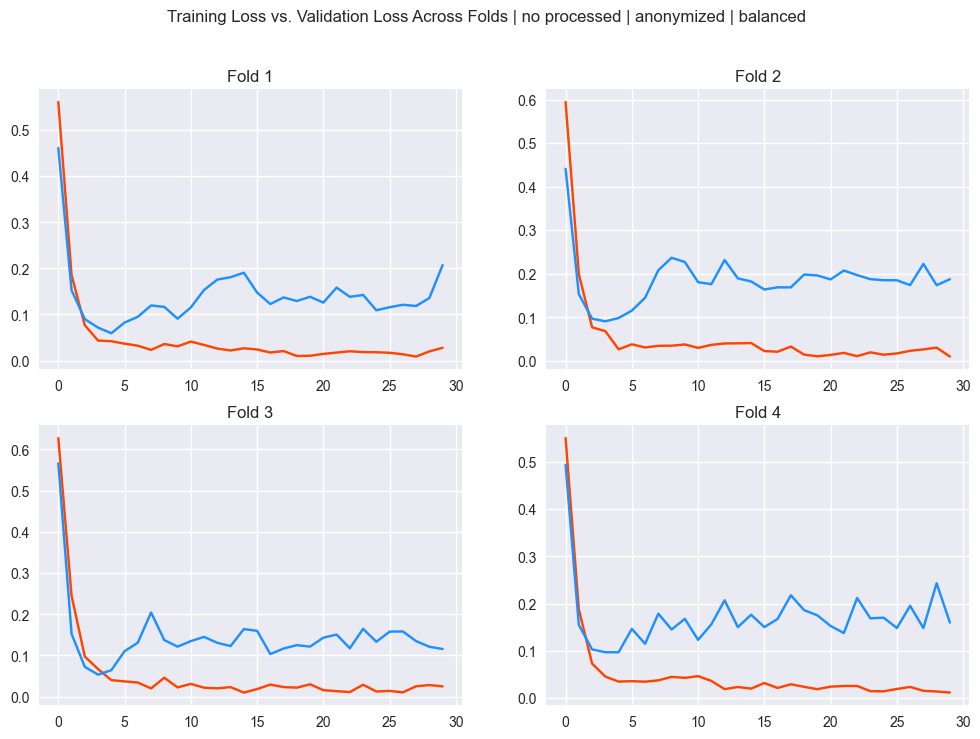

In [66]:
plotter.plot_subplots_curve(all_losses_4, all_val_losses_4, "Training Loss vs. Validation Loss Across Folds | no processed | anonymized | balanced ")

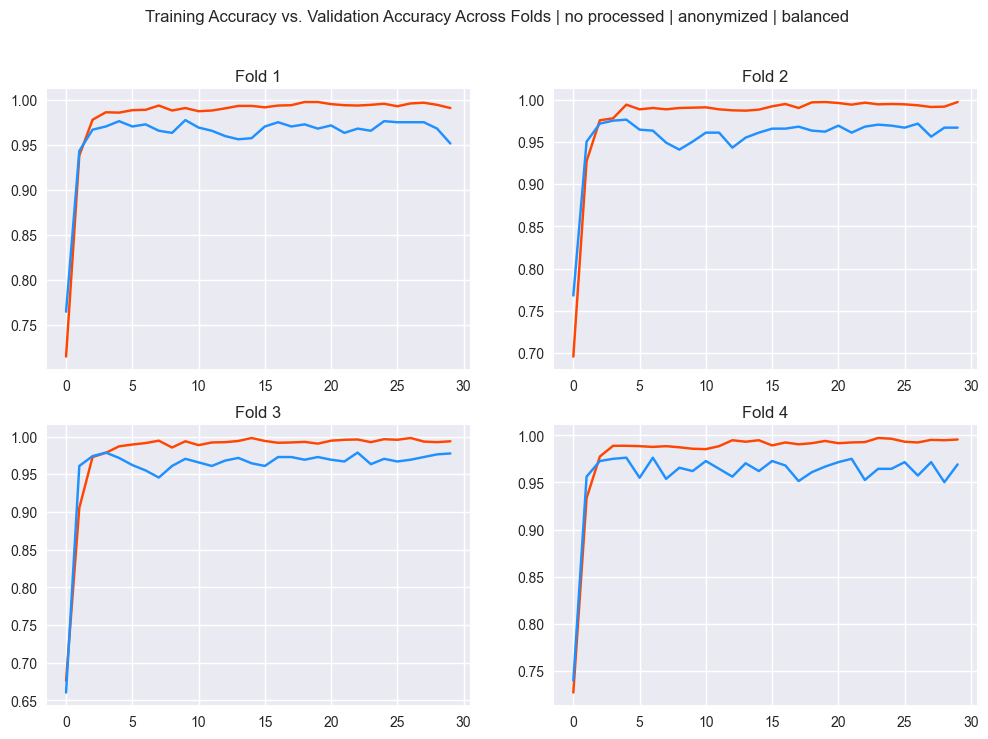

In [67]:
plotter.plot_subplots_curve(all_accuracies_4, all_val_accuracies_4, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | anonymized | balanced")

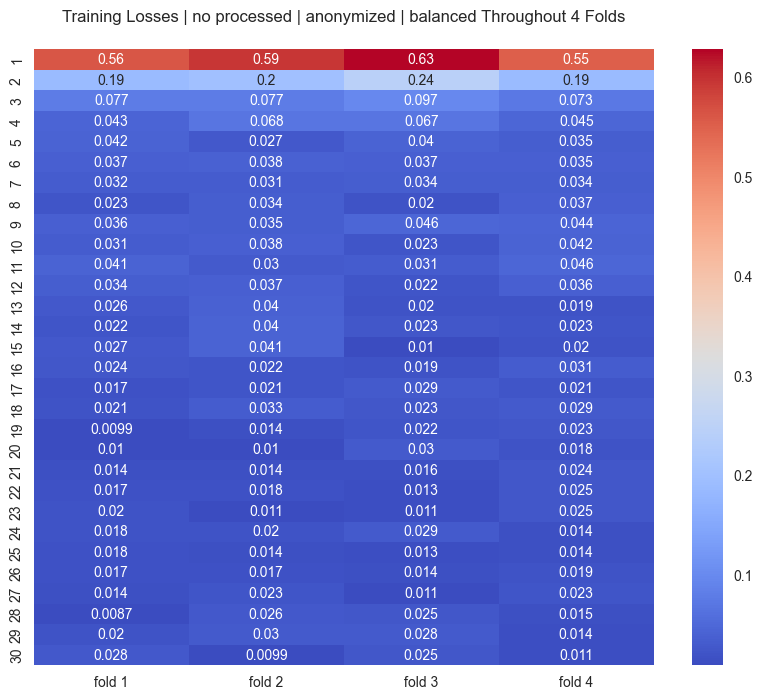

In [68]:
plotter.plot_heatmap(all_losses_4, "Training Losses | no processed | anonymized | balanced")

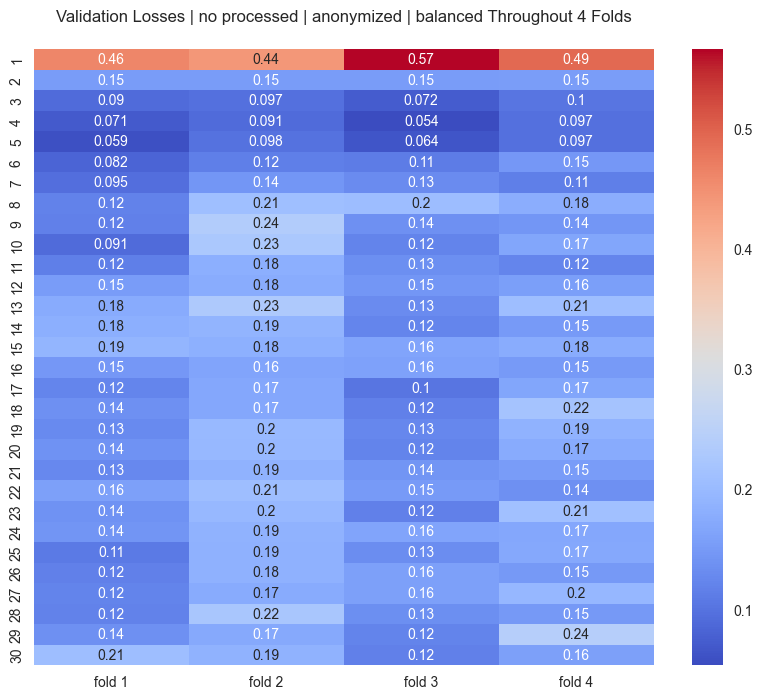

In [69]:
plotter.plot_heatmap(all_val_losses_4, "Validation Losses | no processed | anonymized | balanced")

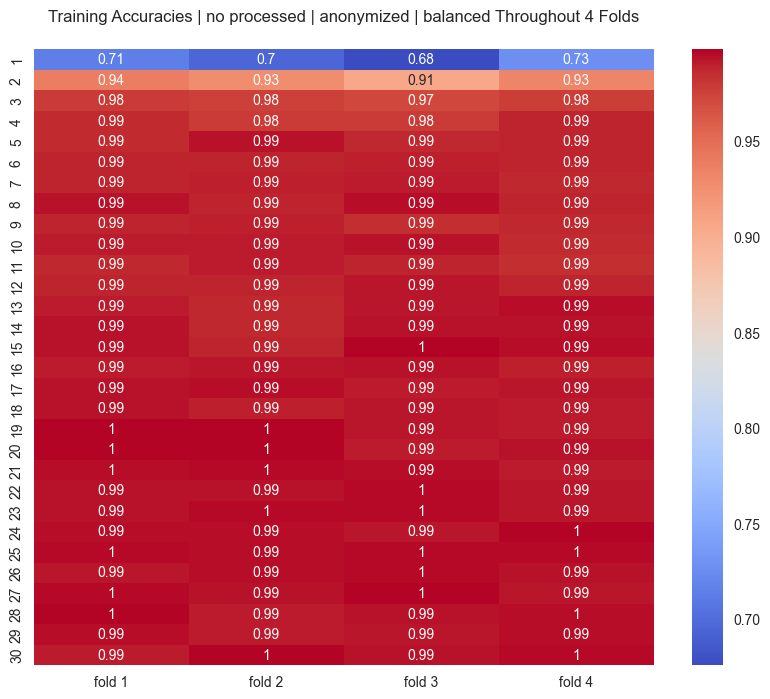

In [70]:
plotter.plot_heatmap(all_accuracies_4, "Training Accuracies | no processed | anonymized | balanced")

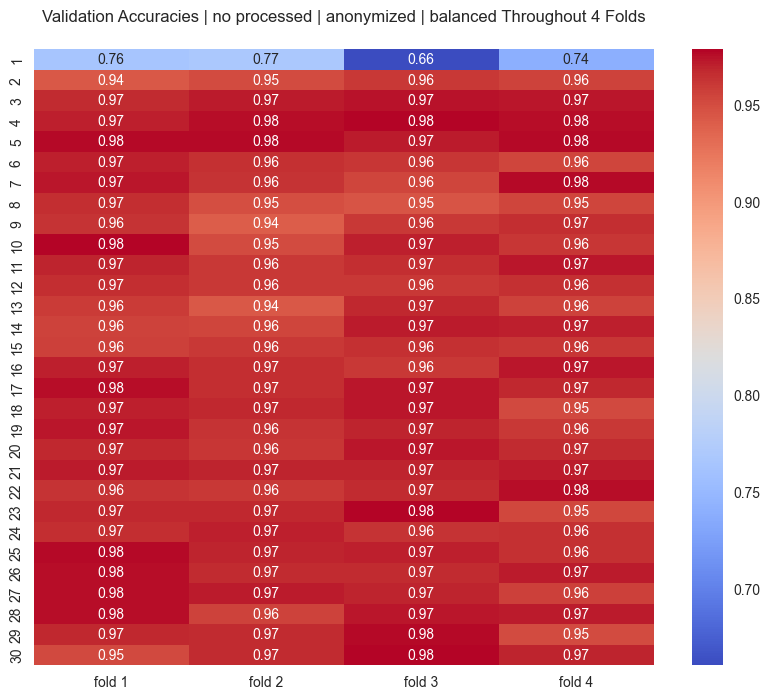

In [71]:
plotter.plot_heatmap(all_val_accuracies_4, "Validation Accuracies | no processed | anonymized | balanced")

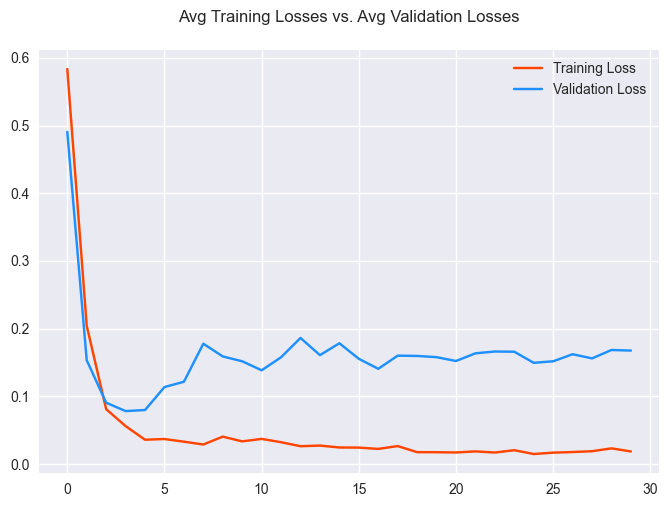

In [72]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_4, avg_val_loss_hist_4, "Training Loss", "Validation Loss")

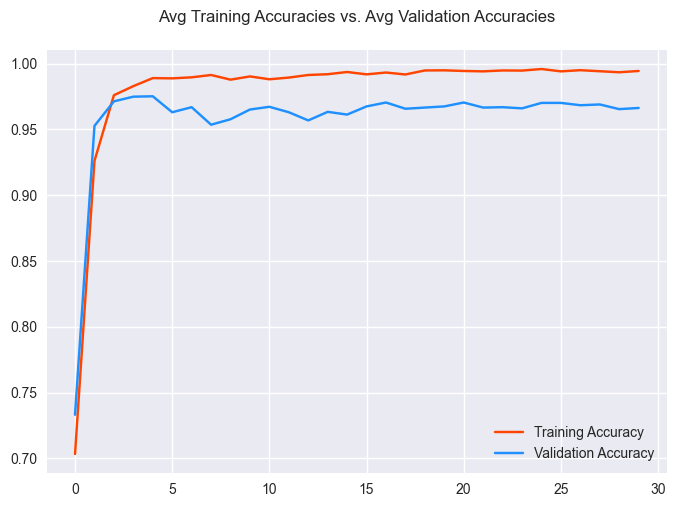

In [73]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_4, avg_val_acc_hist_4, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 2s 8ms/step


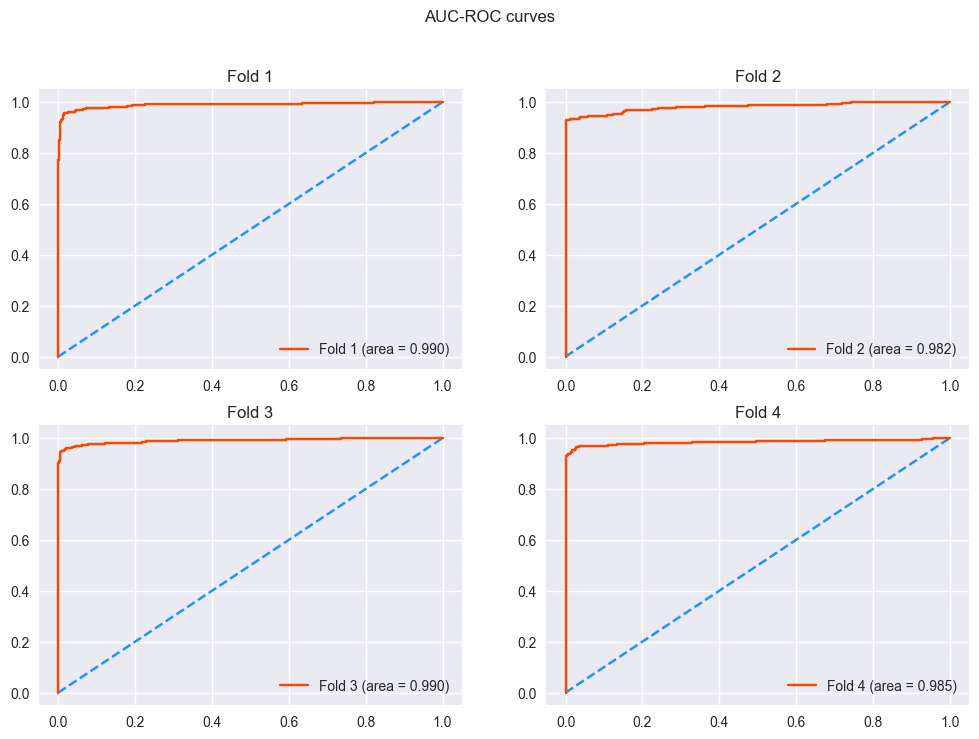

In [74]:
plotter.plot_roc_curve(all_models_4, X_test_vectors_4, y_test)

22/22 [==============================] - 0s 8ms/step


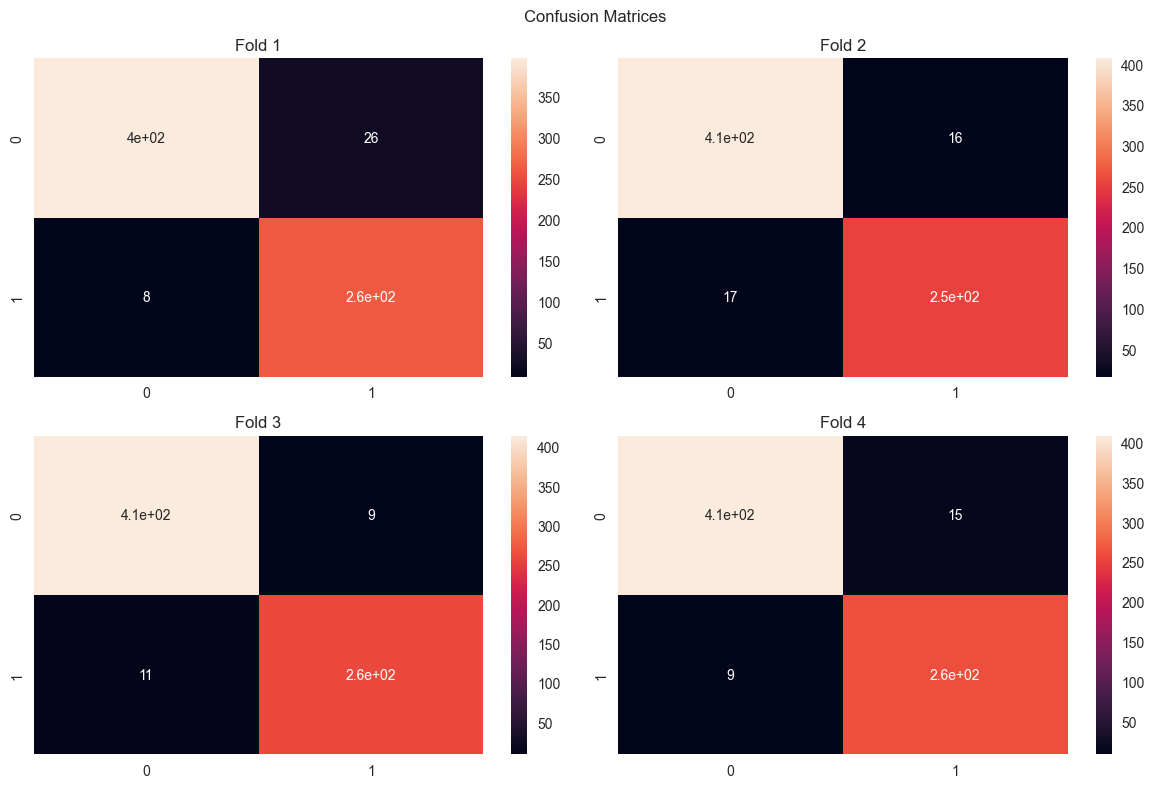

In [75]:
plotter.plot_confusion_matrix(all_models_4, X_test_vectors_4, y_test)

In [76]:
for i, trained_model in enumerate(all_models_4):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_4, y_test))

Model 1:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       423
           1       0.91      0.97      0.94       270

    accuracy                           0.95       693
   macro avg       0.94      0.95      0.95       693
weighted avg       0.95      0.95      0.95       693

Model 2:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       423
           1       0.94      0.94      0.94       270

    accuracy                           0.95       693
   macro avg       0.95      0.95      0.95       693
weighted avg       0.95      0.95      0.95       693

Model 3:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       423
           1       0.97      0.96      0.96       2

In [77]:
print_testing_loss_accuracy(all_models_4, X_test_vectors_4, y_test)

model: 1
22/22 [==============================] - 0s 9ms/step - loss: 0.2068 - accuracy: 0.9509
model: 2
22/22 [==============================] - 0s 9ms/step - loss: 0.2578 - accuracy: 0.9524
model: 3
22/22 [==============================] - 0s 9ms/step - loss: 0.1466 - accuracy: 0.9711
model: 4
22/22 [==============================] - 0s 9ms/step - loss: 0.2011 - accuracy: 0.9654
average testing loss: 0.203
average testing accuracy: 0.960


### Combination 5: (Processing - No anonymization - Imbalancing)

In [78]:
X_train_processed = preprocessor.preprocess_data(X_train["Facts"])
X_test_processed = preprocessor.preprocess_data(X_test["Facts"])

In [79]:
text_vectorizer_5, X_train_vectors_5 = preprocessor.convert_text_to_vectors_tf_idf(X_train_processed)

In [80]:
X_test_vectors_5 = preprocessor.convert_text_to_vectors_tf_idf(X_test_processed, train=False, text_vectorizer=text_vectorizer_5)

In [81]:
all_models_5, all_losses_5, all_val_losses_5, all_accuracies_5, all_val_accuracies_5 = train_model(build_tf_idf_model, X_train_vectors_5, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 14s 84ms/step - loss: 0.7117 - accuracy: 0.6243 - val_loss: 0.6456 - val_accuracy: 0.6734
Epoch 2/30
33/33 [==============================] - 2s 63ms/step - loss: 0.3397 - accuracy: 0.8634 - val_loss: 0.4605 - val_accuracy: 0.8410
Epoch 3/30
33/33 [==============================] - 2s 53ms/step - loss: 0.1499 - accuracy: 0.9524 - val_loss: 0.4748 - val_accuracy: 0.8772
Epoch 4/30
33/33 [==============================] - 2s 51ms/step - loss: 0.0907 - accuracy: 0.9750 - val_loss: 0.5589 - val_accuracy: 0.8960
Epoch 5/30
33/33 [==============================] - 2s 53ms/step - loss: 0.0592 - accuracy: 0.9817 - val_loss: 0.7115 - val_accuracy: 0.8858
Epoch 6/30
33/33 [==============================] - 2s 51ms/step - loss: 0.0488 - accuracy: 0.9875 - val_loss: 0.8412 - val_accuracy: 0.8714
Epoch 7/30
33/33 [==============================] - 2s 53ms/step - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.9484 - val_accuracy: 0.8526
Epoc

In [82]:
avg_loss_hist_5, avg_val_loss_hist_5, avg_acc_hist_5, avg_val_acc_hist_5 = calculate_average_measures(all_losses_5, all_val_losses_5, all_accuracies_5, all_val_accuracies_5)

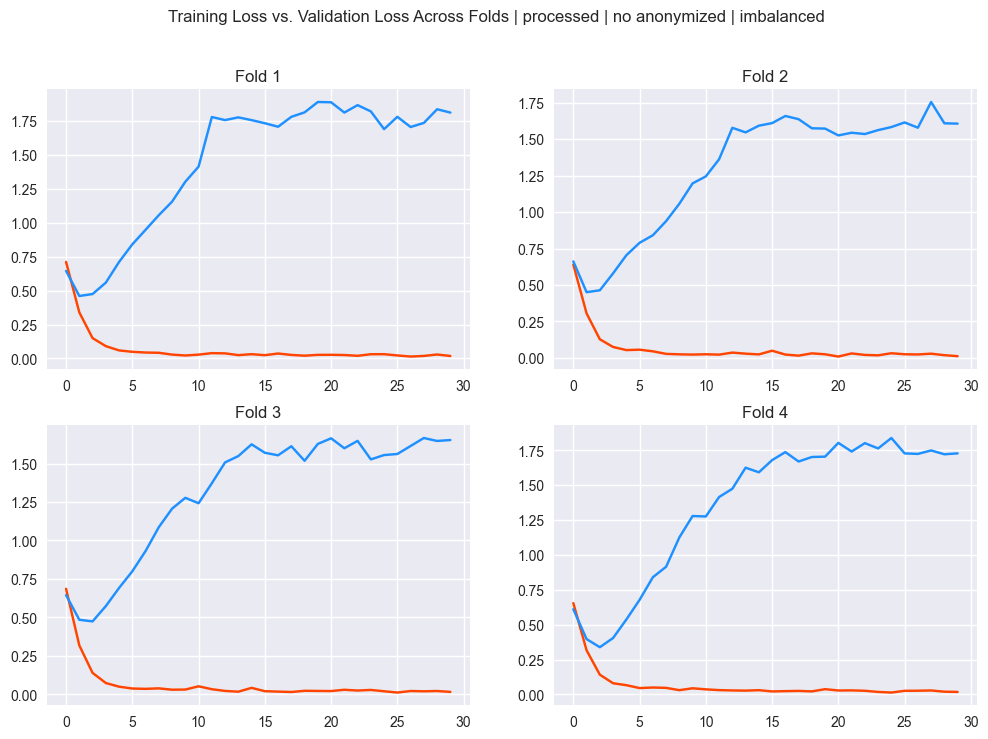

In [83]:
plotter.plot_subplots_curve(all_losses_5, all_val_losses_5, "Training Loss vs. Validation Loss Across Folds | processed | no anonymized | imbalanced")

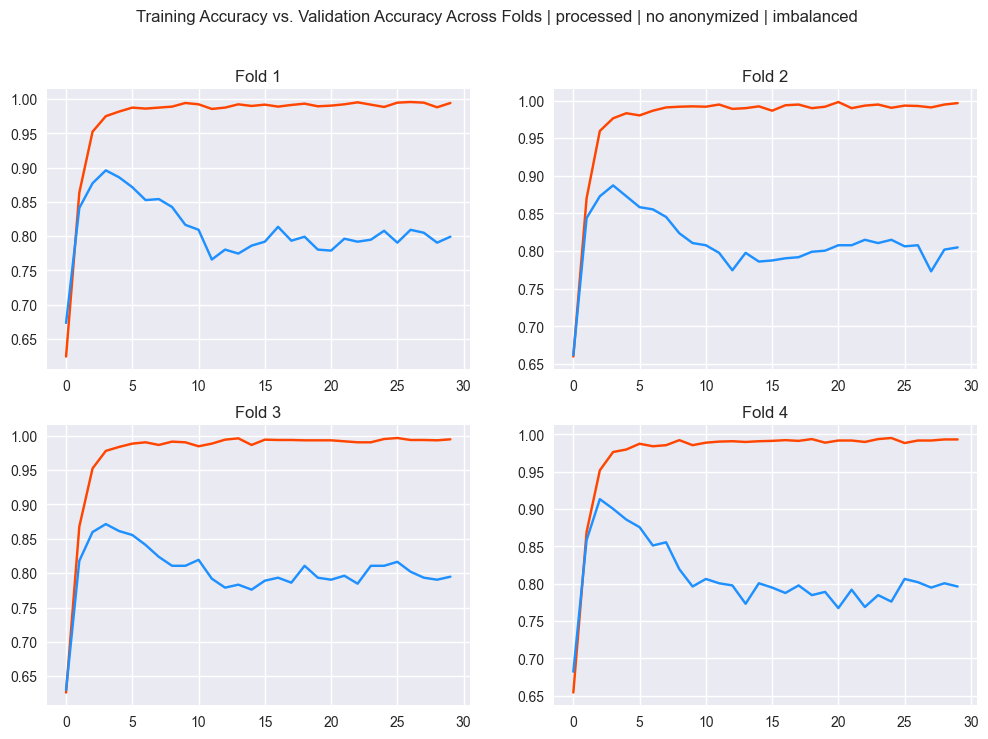

In [84]:
plotter.plot_subplots_curve(all_accuracies_5, all_val_accuracies_5, "Training Accuracy vs. Validation Accuracy Across Folds | processed | no anonymized | imbalanced")

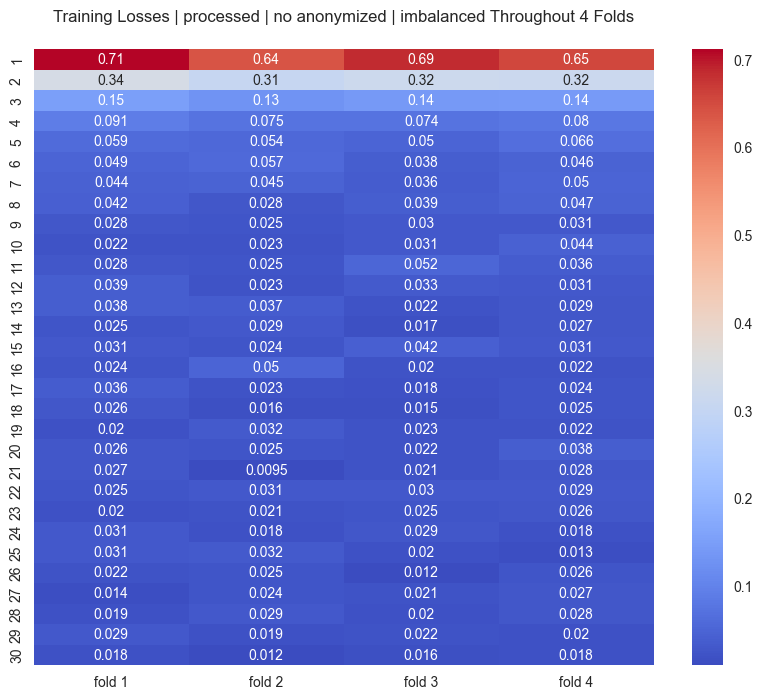

In [85]:
plotter.plot_heatmap(all_losses_5, "Training Losses | processed | no anonymized | imbalanced")

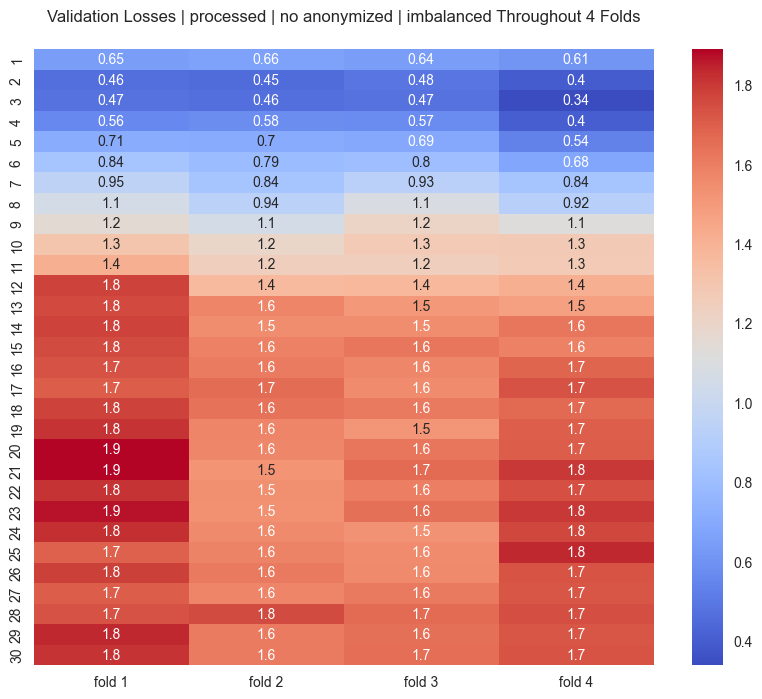

In [86]:
plotter.plot_heatmap(all_val_losses_5, "Validation Losses | processed | no anonymized | imbalanced")

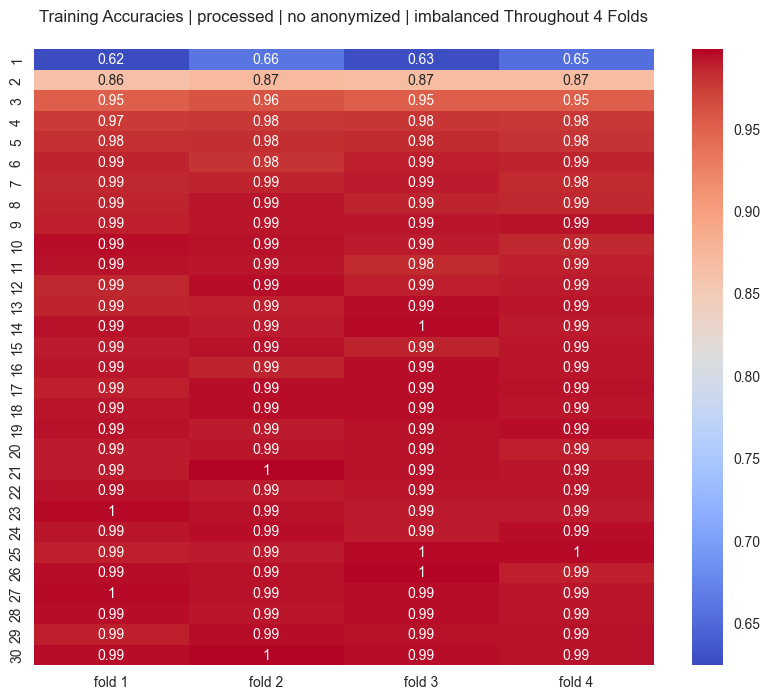

In [87]:
plotter.plot_heatmap(all_accuracies_5, "Training Accuracies | processed | no anonymized | imbalanced")

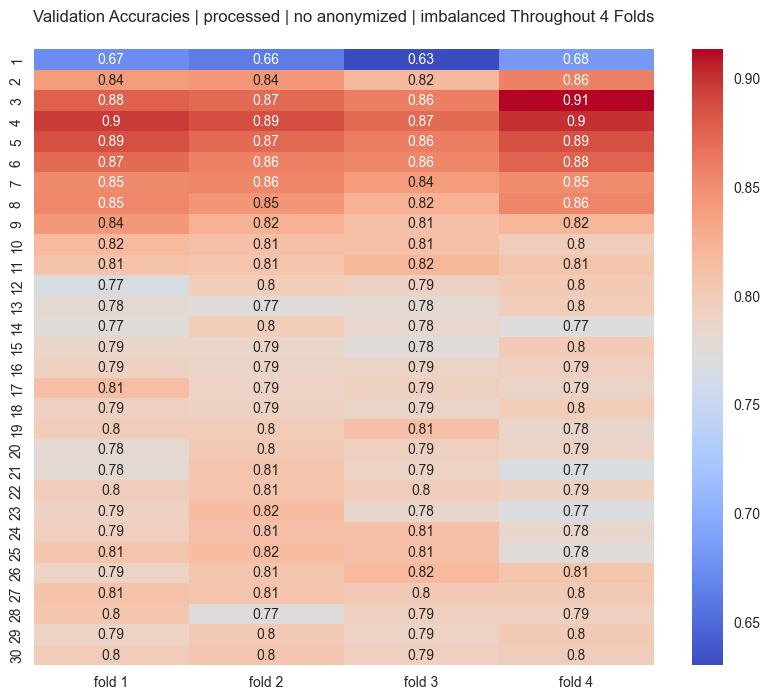

In [88]:
plotter.plot_heatmap(all_val_accuracies_5, "Validation Accuracies | processed | no anonymized | imbalanced")

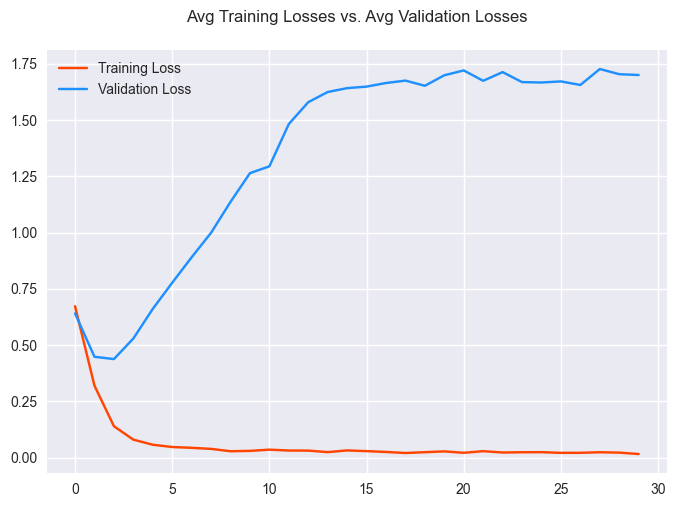

In [89]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_5, avg_val_loss_hist_5, "Training Loss", "Validation Loss")

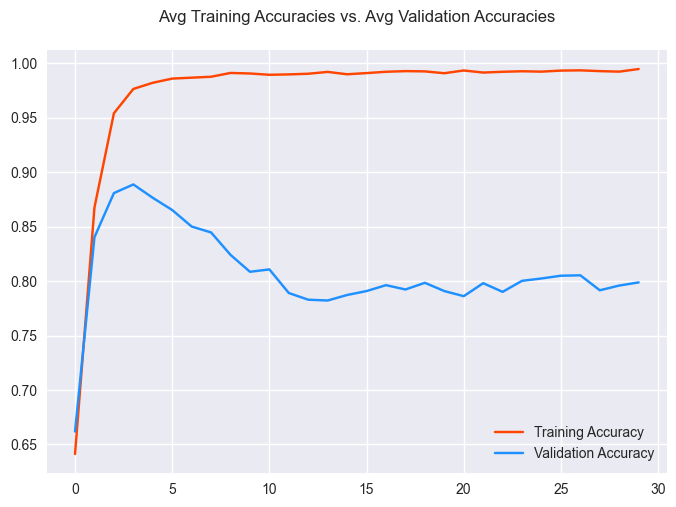

In [90]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_5, avg_val_acc_hist_5, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 1s 8ms/step


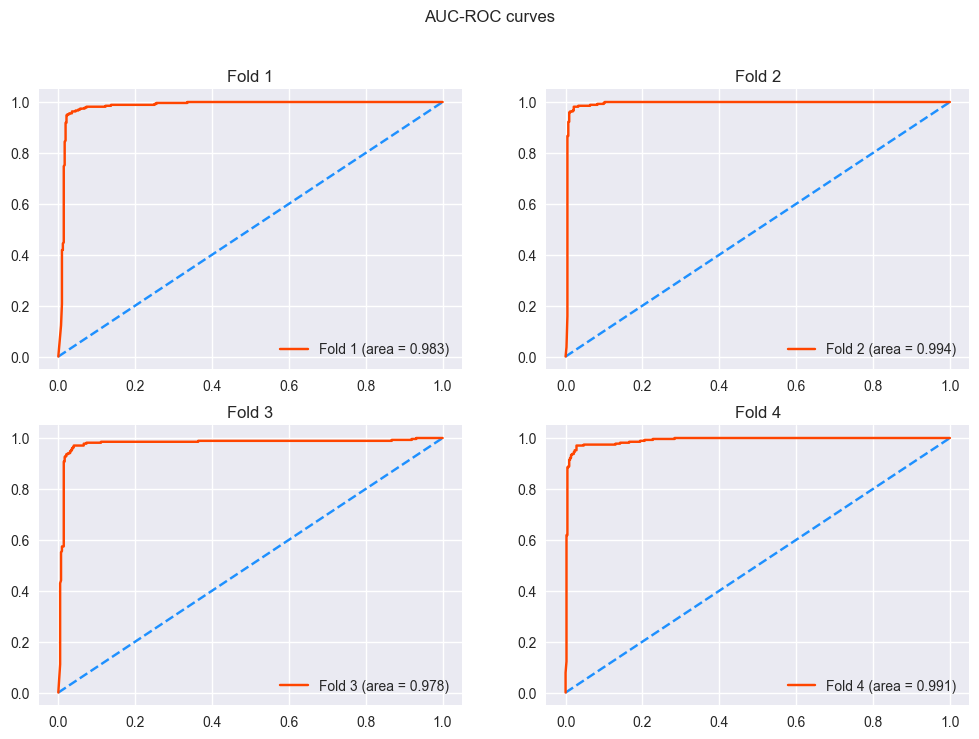

In [91]:
plotter.plot_roc_curve(all_models_5, X_test_vectors_5, y_test)

22/22 [==============================] - 0s 8ms/step


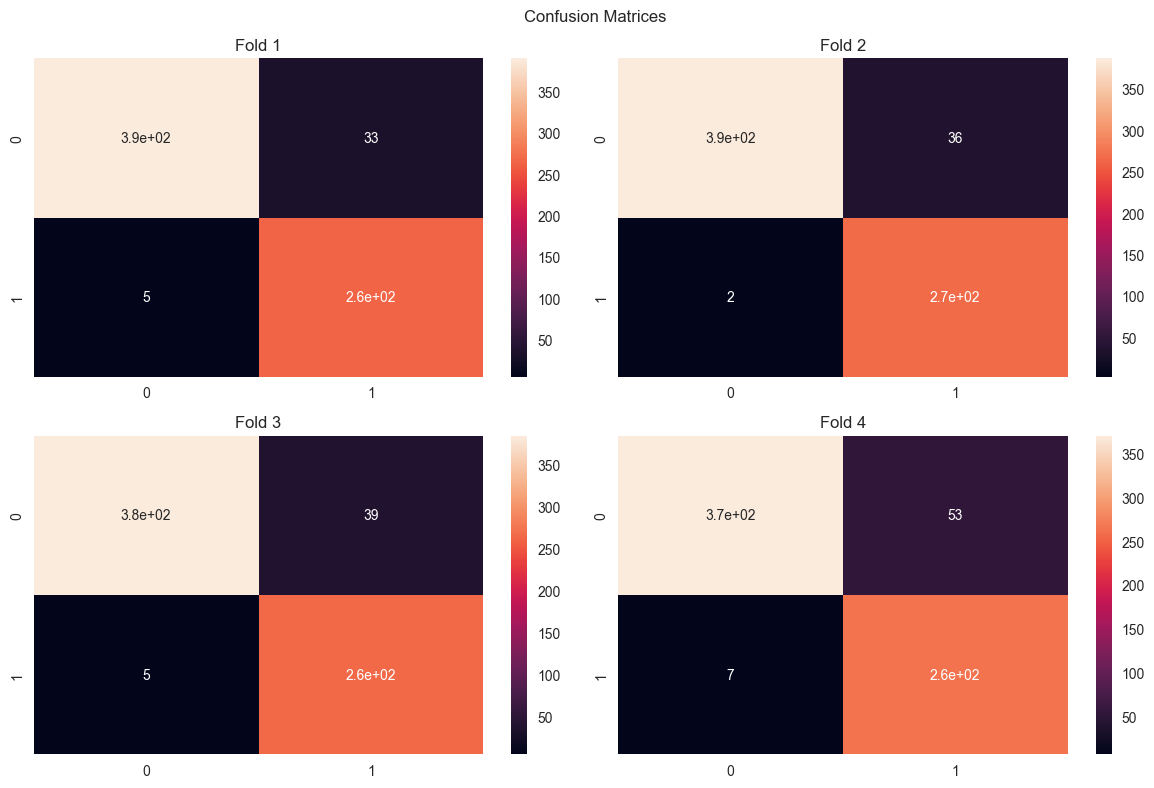

In [92]:
plotter.plot_confusion_matrix(all_models_5, X_test_vectors_5, y_test)

In [93]:
for i, trained_model in enumerate(all_models_5):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_5, y_test))

Model 1:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       423
           1       0.89      0.98      0.93       270

    accuracy                           0.95       693
   macro avg       0.94      0.95      0.94       693
weighted avg       0.95      0.95      0.95       693

Model 2:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       423
           1       0.88      0.99      0.93       270

    accuracy                           0.95       693
   macro avg       0.94      0.95      0.94       693
weighted avg       0.95      0.95      0.95       693

Model 3:
22/22 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       423
           1       0.87      0.98      0.92       2

In [94]:
print_testing_loss_accuracy(all_models_5, X_test_vectors_5, y_test)

model: 1
22/22 [==============================] - 0s 10ms/step - loss: 0.3693 - accuracy: 0.9452
model: 2
22/22 [==============================] - 0s 9ms/step - loss: 0.2650 - accuracy: 0.9452
model: 3
22/22 [==============================] - 0s 9ms/step - loss: 0.3967 - accuracy: 0.9365
model: 4
22/22 [==============================] - 0s 9ms/step - loss: 0.4117 - accuracy: 0.9134
average testing loss: 0.361
average testing accuracy: 0.935


### Combination 6: (Processing - No anonymization - Balancing)

In [95]:
processed_balanced_df = preprocessor.balance_data(X_train_processed, y_train)
X_train_processed_balanced = processed_balanced_df["Facts"]
y_train_processed_balanced = processed_balanced_df["winner_index"]

In [96]:
text_vectorizer_6, X_train_vectors_6 = preprocessor.convert_text_to_vectors_tf_idf(X_train_processed_balanced)

In [97]:
X_test_vectors_6 = preprocessor.convert_text_to_vectors_tf_idf(X_test_processed, train=False, text_vectorizer=text_vectorizer_6)

In [98]:
all_models_6, all_losses_6, all_val_losses_6, all_accuracies_6, all_val_accuracies_6 = train_model(build_tf_idf_model, X_train_vectors_6, y_train_processed_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 14s 81ms/step - loss: 0.5936 - accuracy: 0.6926 - val_loss: 0.5447 - val_accuracy: 0.7148
Epoch 2/30
40/40 [==============================] - 2s 61ms/step - loss: 0.2294 - accuracy: 0.9086 - val_loss: 0.3243 - val_accuracy: 0.8840
Epoch 3/30
40/40 [==============================] - 2s 54ms/step - loss: 0.0971 - accuracy: 0.9704 - val_loss: 0.2824 - val_accuracy: 0.9195
Epoch 4/30
40/40 [==============================] - 2s 55ms/step - loss: 0.0538 - accuracy: 0.9846 - val_loss: 0.3483 - val_accuracy: 0.9231
Epoch 5/30
40/40 [==============================] - 2s 53ms/step - loss: 0.0430 - accuracy: 0.9870 - val_loss: 0.3861 - val_accuracy: 0.9254
Epoch 6/30
40/40 [==============================] - 2s 57ms/step - loss: 0.0491 - accuracy: 0.9838 - val_loss: 0.4333 - val_accuracy: 0.9195
Epoch 7/30
40/40 [==============================] - 2s 55ms/step - loss: 0.0425 - accuracy: 0.9866 - val_loss: 0.5386 - val_accuracy: 0.9041
Epoc

In [99]:
avg_loss_hist_6, avg_val_loss_hist_6, avg_acc_hist_6, avg_val_acc_hist_6 = calculate_average_measures(all_losses_6, all_val_losses_6, all_accuracies_6, all_val_accuracies_6)

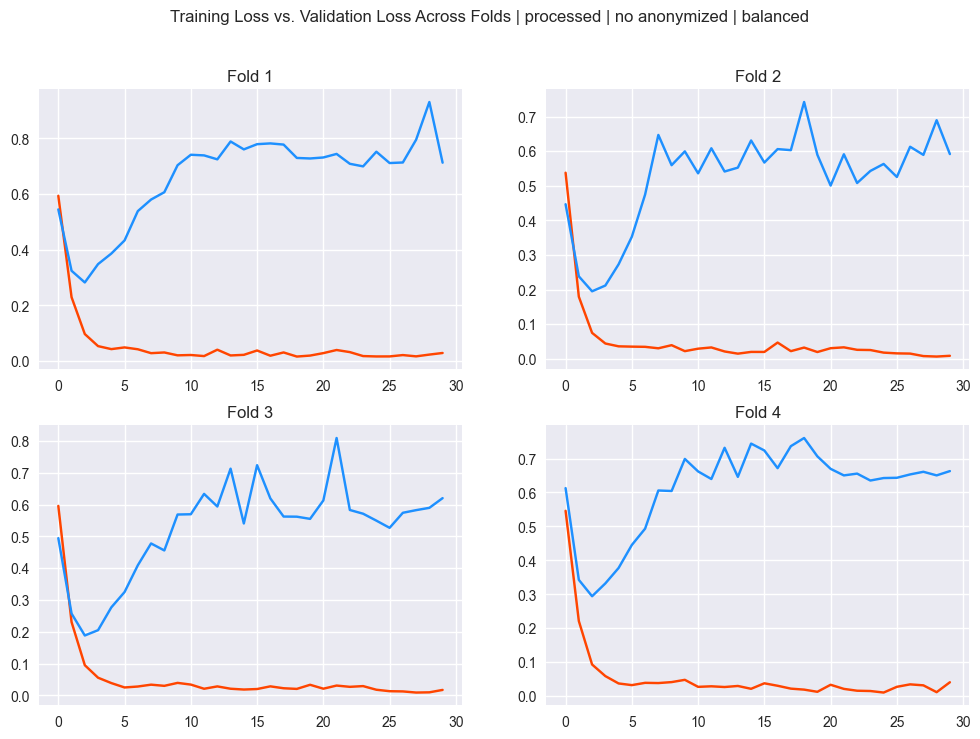

In [100]:
plotter.plot_subplots_curve(all_losses_6, all_val_losses_6, "Training Loss vs. Validation Loss Across Folds | processed | no anonymized | balanced")

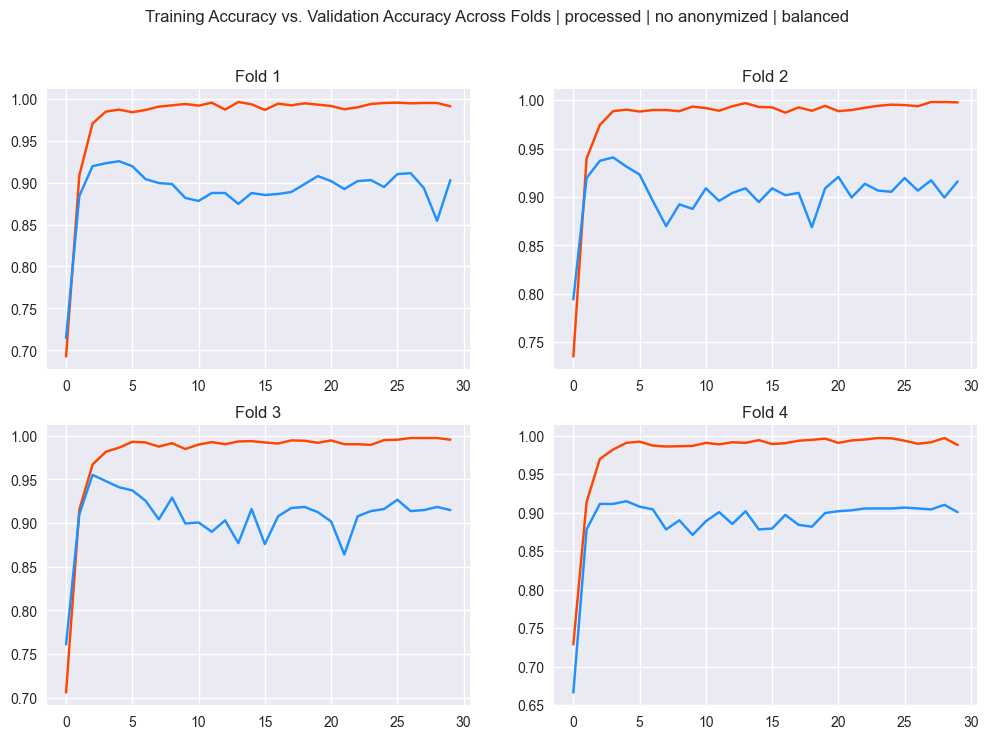

In [101]:
plotter.plot_subplots_curve(all_accuracies_6, all_val_accuracies_6, "Training Accuracy vs. Validation Accuracy Across Folds | processed | no anonymized | balanced")

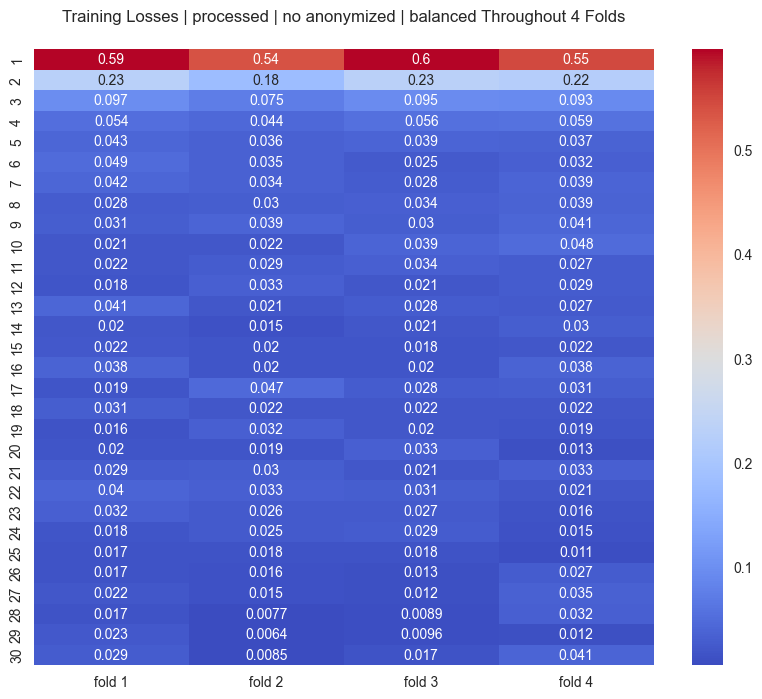

In [102]:
plotter.plot_heatmap(all_losses_6, "Training Losses | processed | no anonymized | balanced")

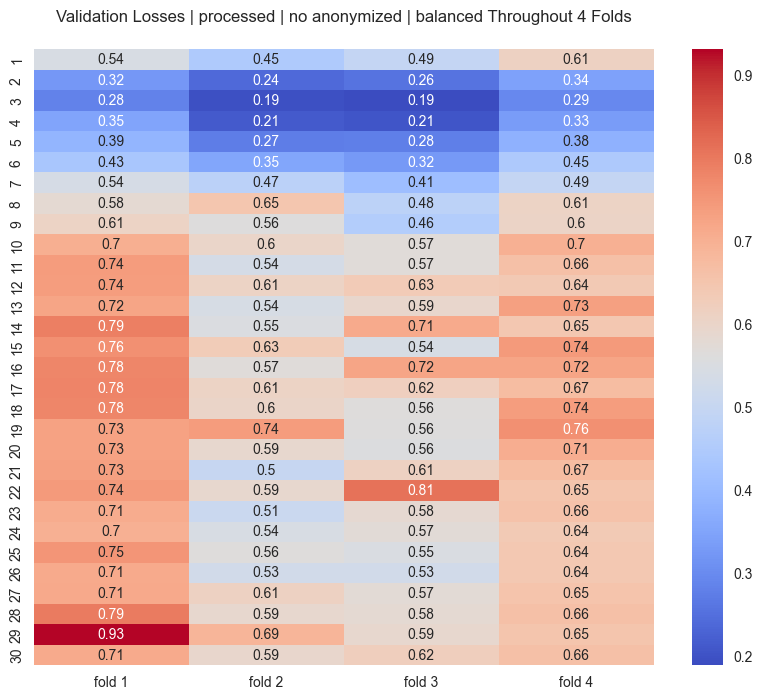

In [103]:
plotter.plot_heatmap(all_val_losses_6, "Validation Losses | processed | no anonymized | balanced")

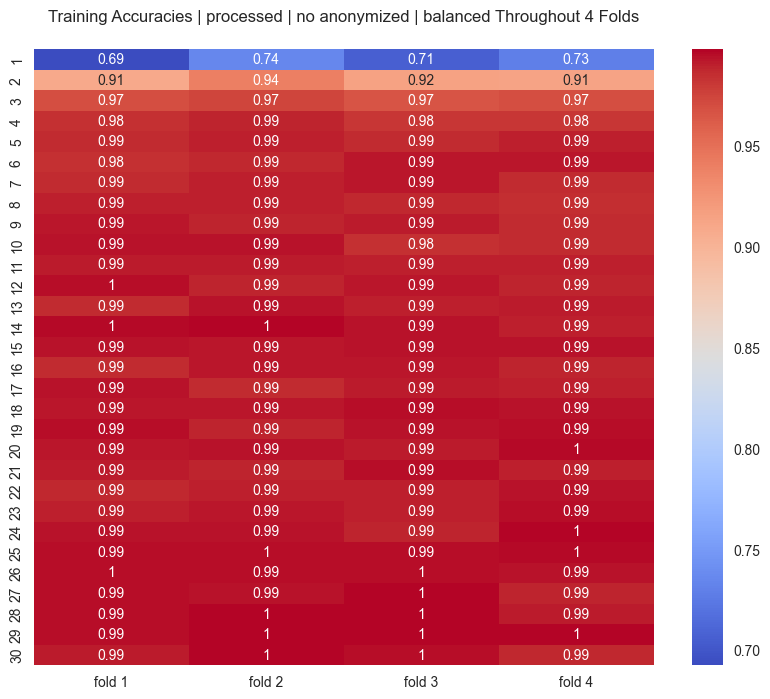

In [104]:
plotter.plot_heatmap(all_accuracies_6, "Training Accuracies | processed | no anonymized | balanced")

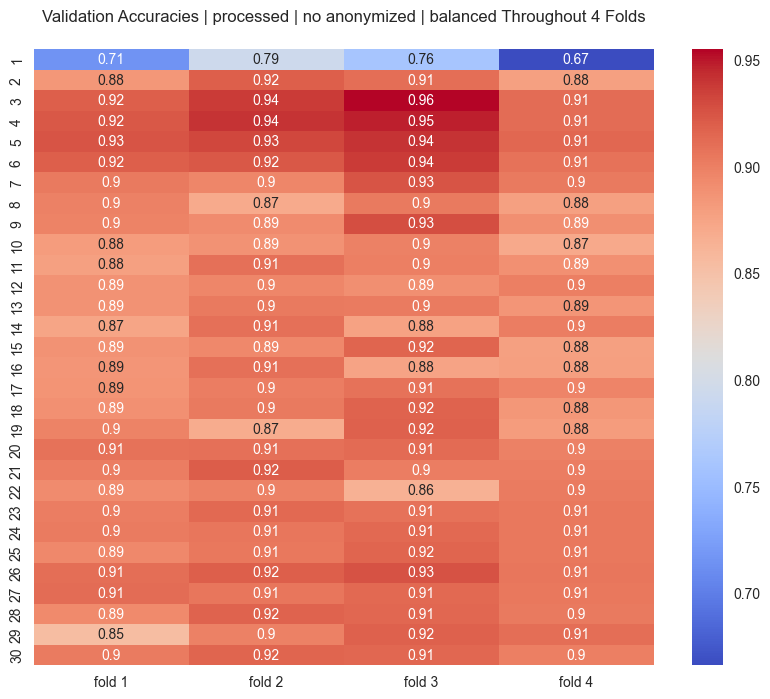

In [105]:
plotter.plot_heatmap(all_val_accuracies_6, "Validation Accuracies | processed | no anonymized | balanced")

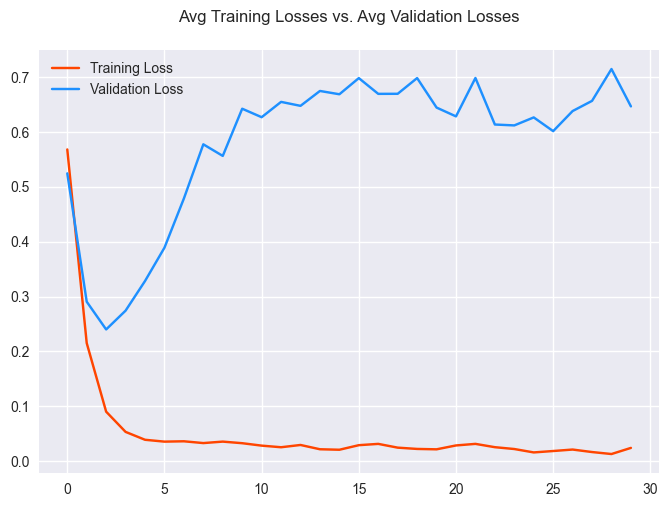

In [106]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_6, avg_val_loss_hist_6, "Training Loss", "Validation Loss")

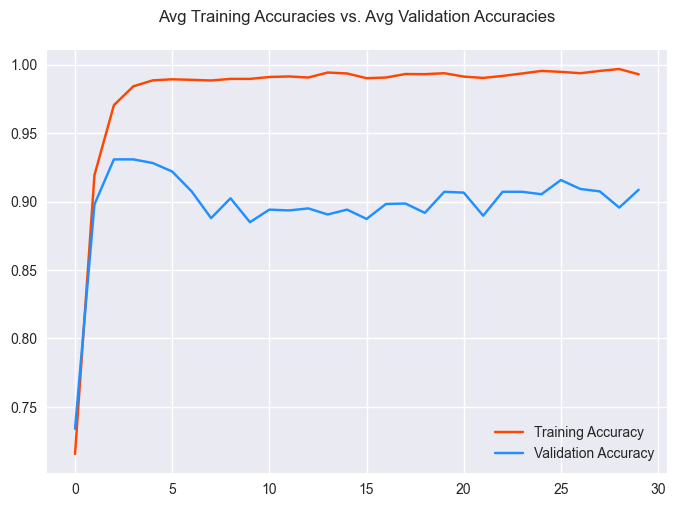

In [107]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_6, avg_val_acc_hist_6, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 1s 9ms/step


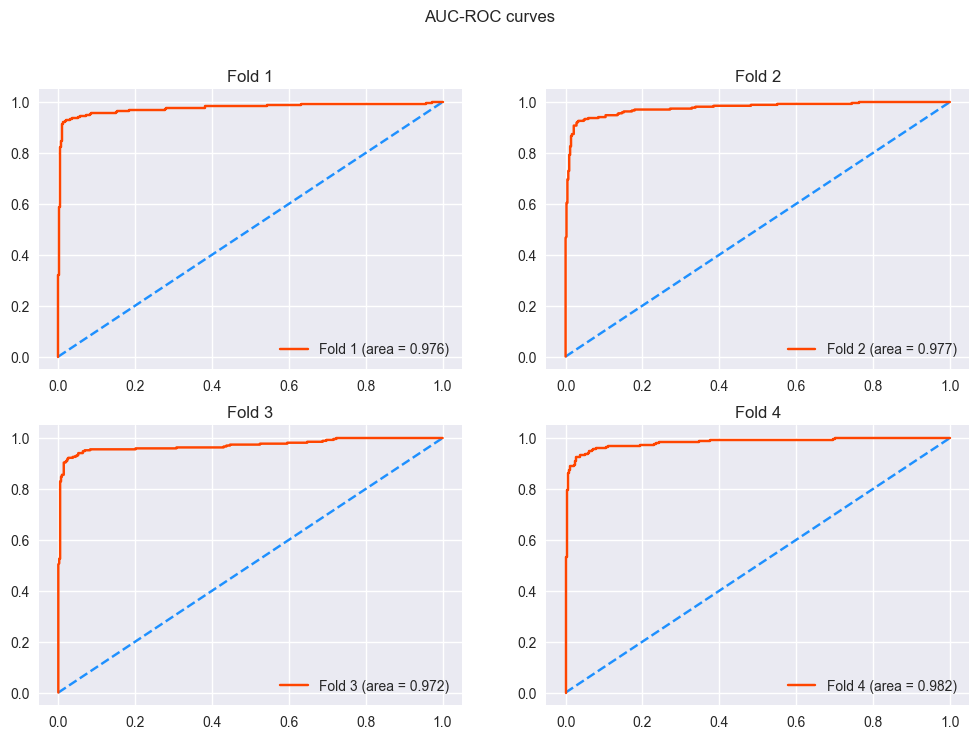

In [108]:
plotter.plot_roc_curve(all_models_6, X_test_vectors_6, y_test)

22/22 [==============================] - 0s 8ms/step


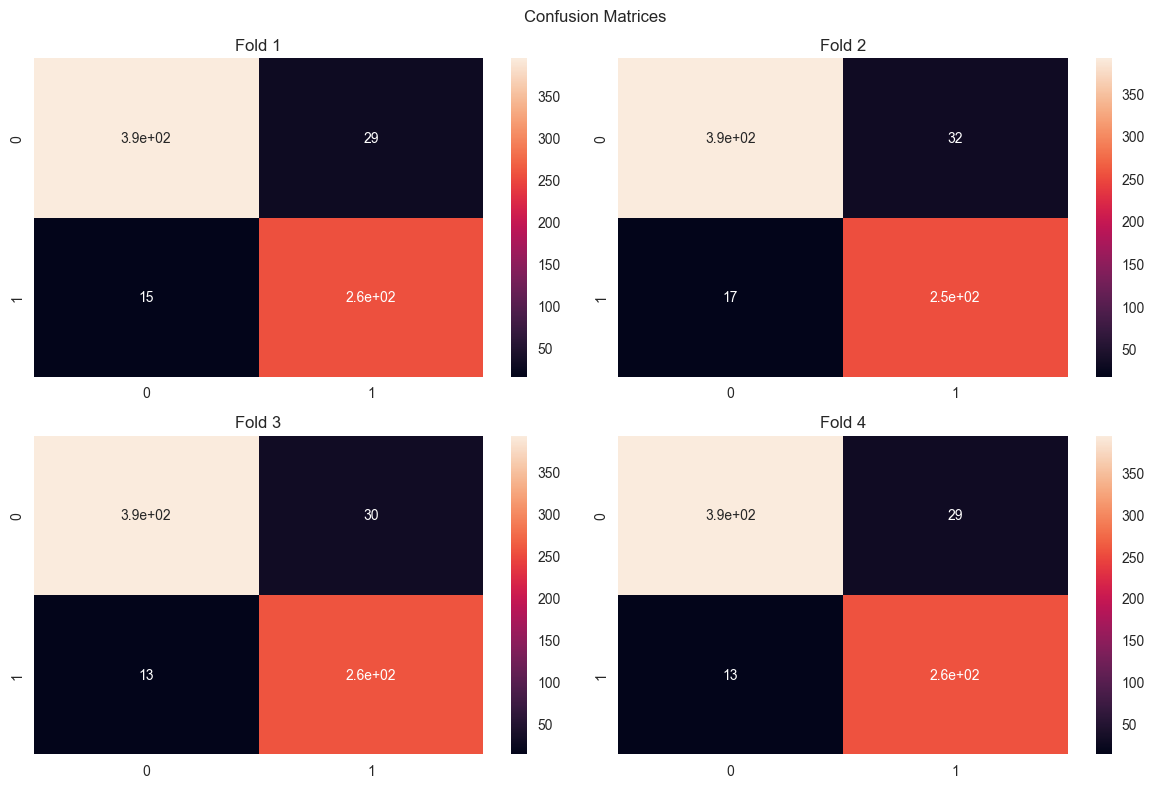

In [109]:
plotter.plot_confusion_matrix(all_models_6, X_test_vectors_6, y_test)

In [110]:
for i, trained_model in enumerate(all_models_6):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_6, y_test))

Model 1:
22/22 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       423
           1       0.90      0.94      0.92       270

    accuracy                           0.94       693
   macro avg       0.93      0.94      0.93       693
weighted avg       0.94      0.94      0.94       693

Model 2:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       423
           1       0.89      0.94      0.91       270

    accuracy                           0.93       693
   macro avg       0.92      0.93      0.93       693
weighted avg       0.93      0.93      0.93       693

Model 3:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       423
           1       0.90      0.95      0.92       2

In [111]:
print_testing_loss_accuracy(all_models_6, X_test_vectors_6, y_test)

model: 1
22/22 [==============================] - 0s 9ms/step - loss: 0.3272 - accuracy: 0.9365
model: 2
22/22 [==============================] - 0s 9ms/step - loss: 0.3931 - accuracy: 0.9293
model: 3
22/22 [==============================] - 0s 9ms/step - loss: 0.4007 - accuracy: 0.9380
model: 4
22/22 [==============================] - 0s 9ms/step - loss: 0.2813 - accuracy: 0.9394
average testing loss: 0.351
average testing accuracy: 0.936


### Combination 7: (Processing - anonymization - Imbalancing)

In [112]:
X_train_processed_anonymized = preprocessor.preprocess_data(anonymized_facts_4)

In [113]:
X_test_processed_anonymized = preprocessor.preprocess_data(test_anonymized_facts_4)

In [114]:
text_vectorizer_7, X_train_vectors_7 = preprocessor.convert_text_to_vectors_tf_idf(X_train_processed_anonymized)

In [115]:
X_test_vectors_7 = preprocessor.convert_text_to_vectors_tf_idf(X_test_processed_anonymized, train=False, text_vectorizer=text_vectorizer_7)

In [116]:
all_models_7, all_losses_7, all_val_losses_7, all_accuracies_7, all_val_accuracies_7 = train_model(build_tf_idf_model, X_train_vectors_7, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 14s 87ms/step - loss: 0.6764 - accuracy: 0.6474 - val_loss: 0.5717 - val_accuracy: 0.7182
Epoch 2/30
33/33 [==============================] - 2s 61ms/step - loss: 0.3396 - accuracy: 0.8634 - val_loss: 0.3180 - val_accuracy: 0.8887
Epoch 3/30
33/33 [==============================] - 2s 55ms/step - loss: 0.1421 - accuracy: 0.9456 - val_loss: 0.2249 - val_accuracy: 0.9364
Epoch 4/30
33/33 [==============================] - 2s 55ms/step - loss: 0.0771 - accuracy: 0.9755 - val_loss: 0.2505 - val_accuracy: 0.9422
Epoch 5/30
33/33 [==============================] - 2s 53ms/step - loss: 0.0390 - accuracy: 0.9923 - val_loss: 0.3213 - val_accuracy: 0.9364
Epoch 6/30
33/33 [==============================] - 2s 52ms/step - loss: 0.0528 - accuracy: 0.9808 - val_loss: 0.3975 - val_accuracy: 0.9220
Epoch 7/30
33/33 [==============================] - 2s 54ms/step - loss: 0.0439 - accuracy: 0.9851 - val_loss: 0.4555 - val_accuracy: 0.9118
Epoc

In [117]:
avg_loss_hist_7, avg_val_loss_hist_7, avg_acc_hist_7, avg_val_acc_hist_7 = calculate_average_measures(all_losses_7, all_val_losses_7, all_accuracies_7, all_val_accuracies_7)

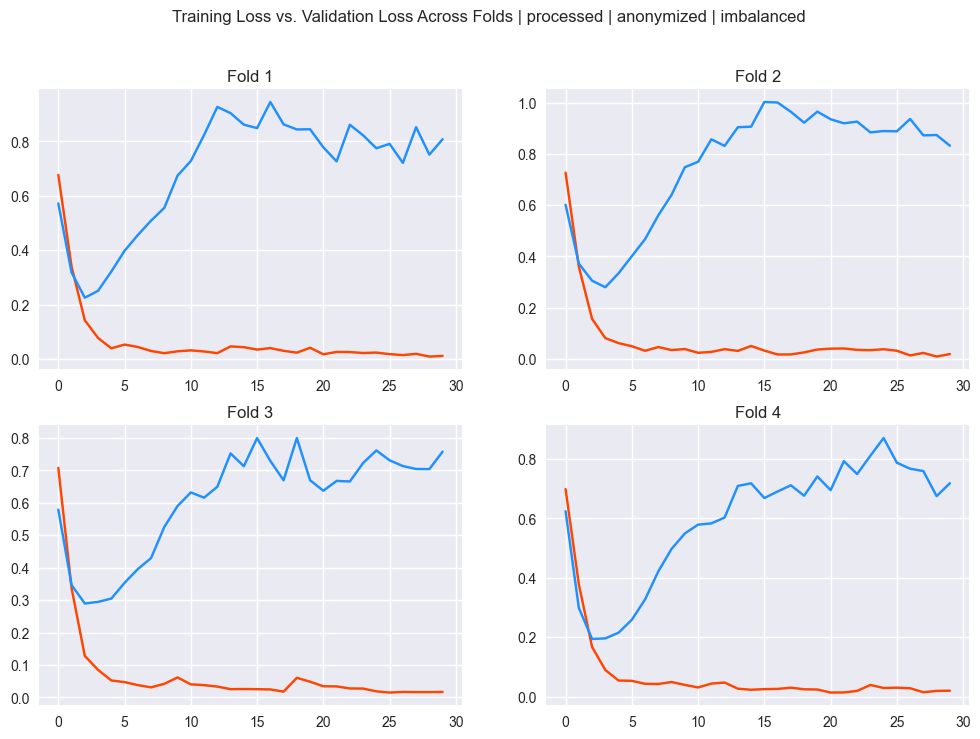

In [118]:
plotter.plot_subplots_curve(all_losses_7, all_val_losses_7, "Training Loss vs. Validation Loss Across Folds | processed | anonymized | imbalanced")

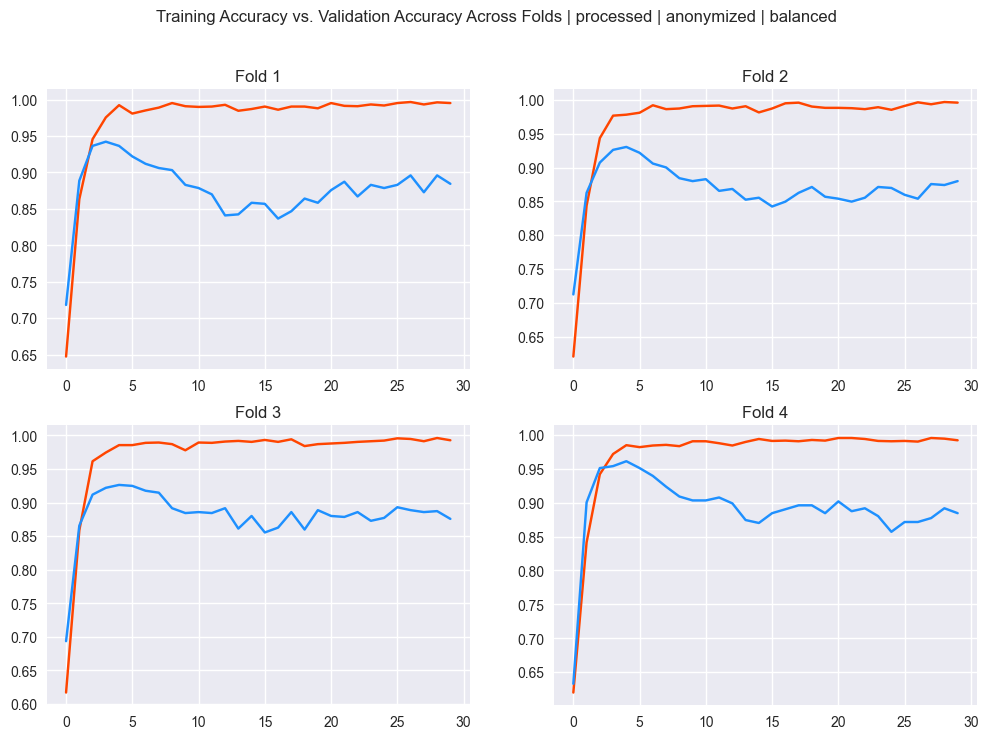

In [119]:
plotter.plot_subplots_curve(all_accuracies_7, all_val_accuracies_7, "Training Accuracy vs. Validation Accuracy Across Folds | processed | anonymized | balanced")

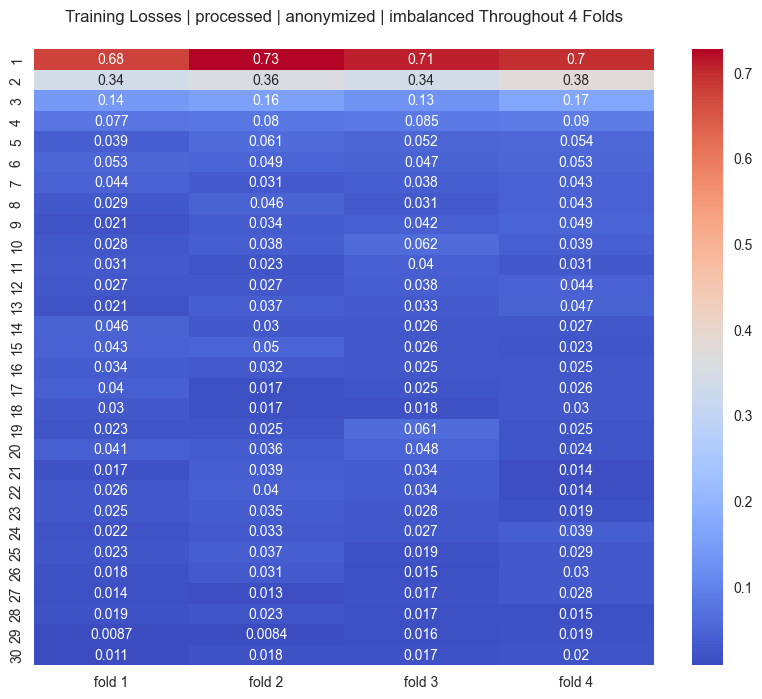

In [120]:
plotter.plot_heatmap(all_losses_7, "Training Losses | processed | anonymized | imbalanced")

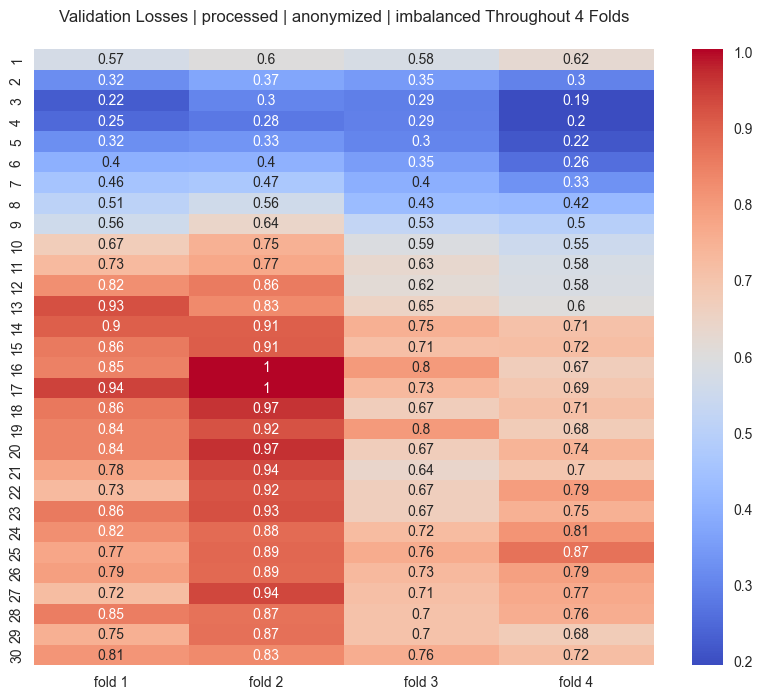

In [121]:
plotter.plot_heatmap(all_val_losses_7, "Validation Losses | processed | anonymized | imbalanced")

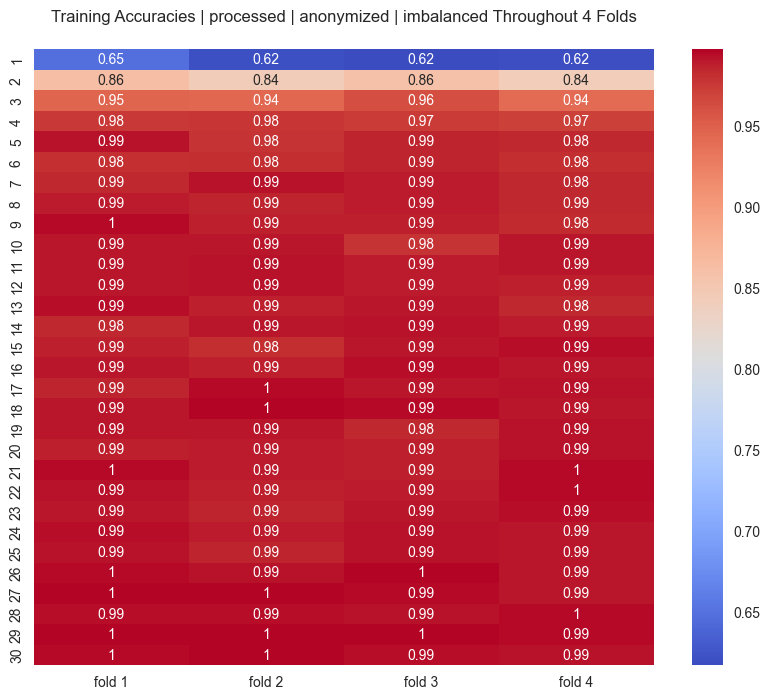

In [122]:
plotter.plot_heatmap(all_accuracies_7, "Training Accuracies | processed | anonymized | imbalanced")

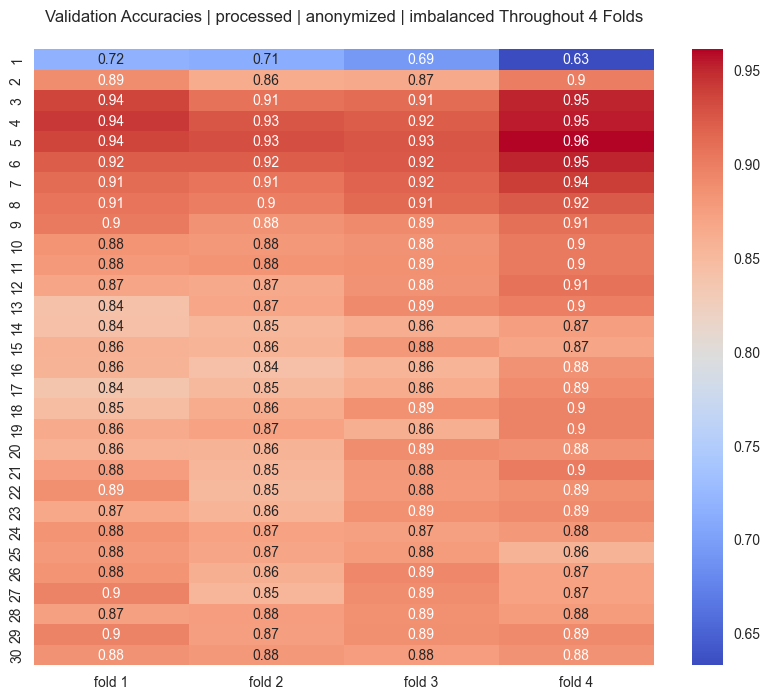

In [123]:
plotter.plot_heatmap(all_val_accuracies_7, "Validation Accuracies | processed | anonymized | imbalanced")

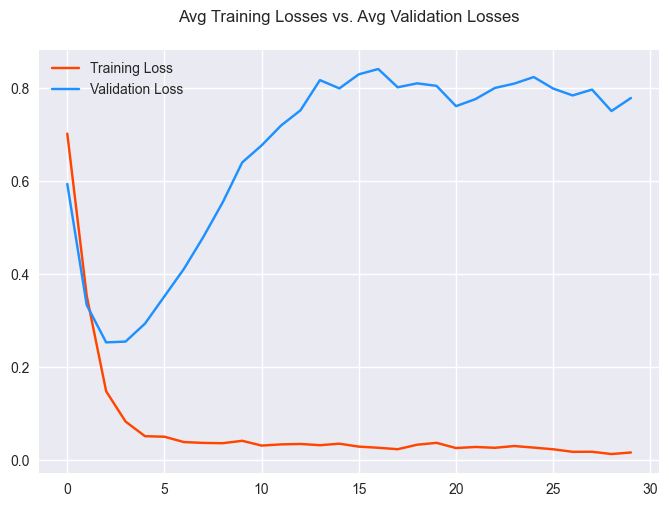

In [124]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_7, avg_val_loss_hist_7, "Training Loss", "Validation Loss")

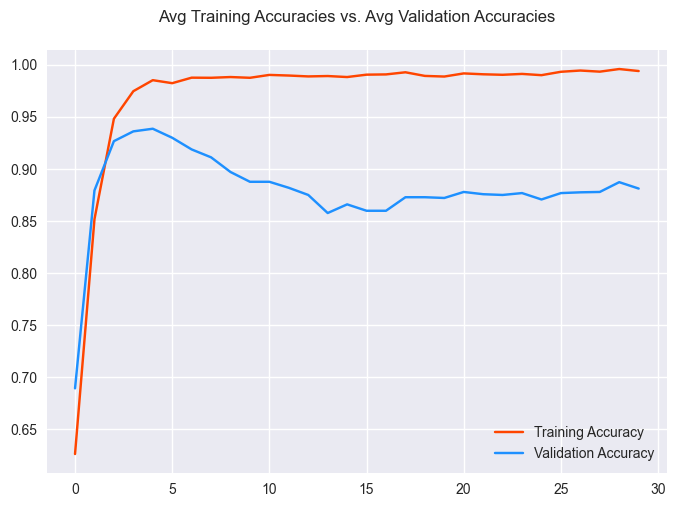

In [125]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_7, avg_val_acc_hist_7, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 1s 8ms/step


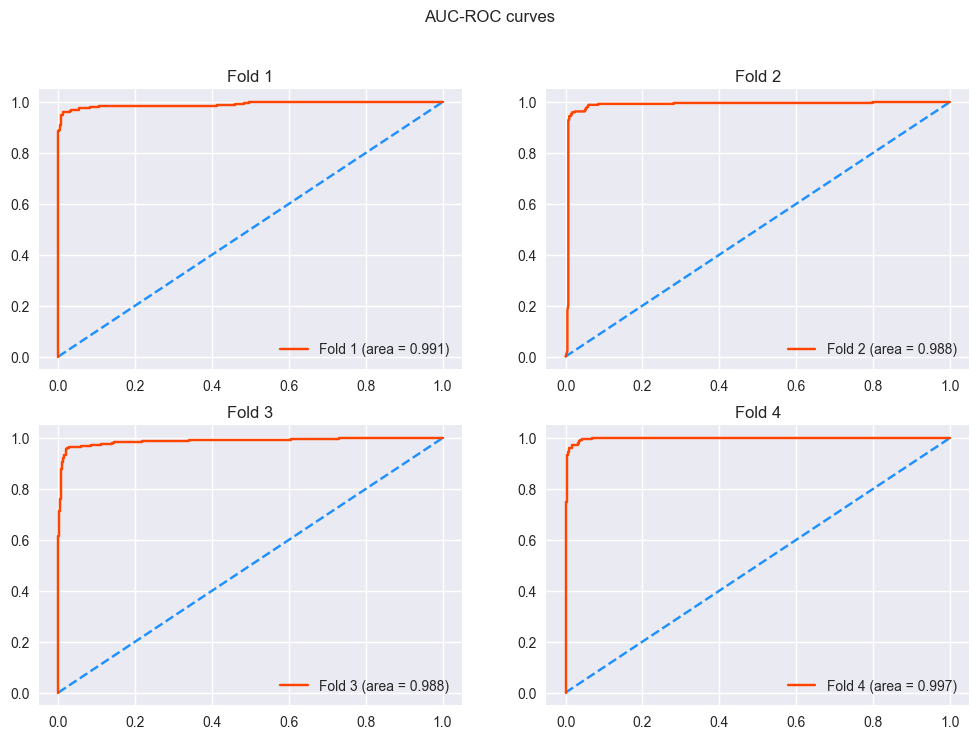

In [126]:
plotter.plot_roc_curve(all_models_7, X_test_vectors_7, y_test)

22/22 [==============================] - 0s 8ms/step


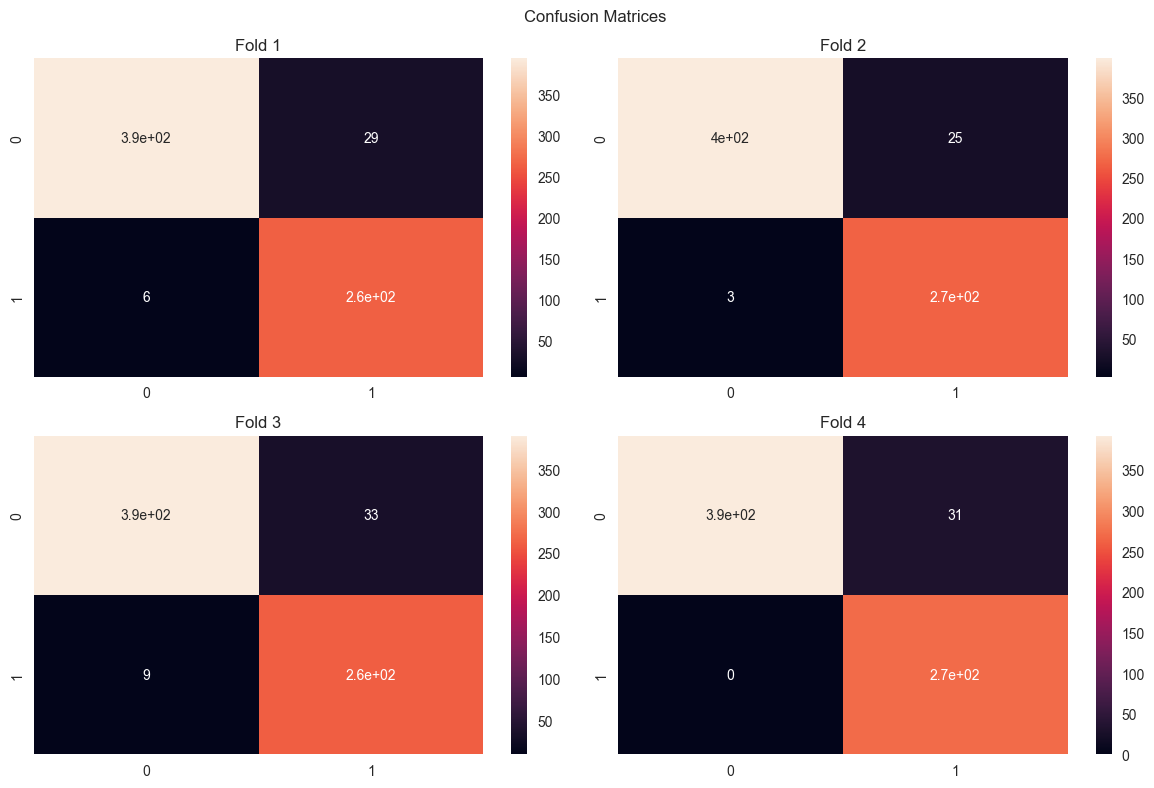

In [127]:
plotter.plot_confusion_matrix(all_models_7, X_test_vectors_7, y_test)

In [128]:
for i, trained_model in enumerate(all_models_7):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_7, y_test))

Model 1:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       423
           1       0.90      0.98      0.94       270

    accuracy                           0.95       693
   macro avg       0.94      0.95      0.95       693
weighted avg       0.95      0.95      0.95       693

Model 2:
22/22 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       423
           1       0.91      0.99      0.95       270

    accuracy                           0.96       693
   macro avg       0.95      0.96      0.96       693
weighted avg       0.96      0.96      0.96       693

Model 3:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       423
           1       0.89      0.97      0.93       2

In [129]:
print_testing_loss_accuracy(all_models_7, X_test_vectors_7, y_test)

model: 1
22/22 [==============================] - 0s 9ms/step - loss: 0.2469 - accuracy: 0.9495
model: 2
22/22 [==============================] - 0s 8ms/step - loss: 0.2110 - accuracy: 0.9596
model: 3
22/22 [==============================] - 0s 9ms/step - loss: 0.2886 - accuracy: 0.9394
model: 4
22/22 [==============================] - 0s 9ms/step - loss: 0.1855 - accuracy: 0.9553
average testing loss: 0.233
average testing accuracy: 0.951


### Combination 8: (Processing - anonymization - Balancing)

In [130]:
processed_anonymized_balanced_df = preprocessor.balance_data(X_train_processed_anonymized, y_train)
processed_anonymized_balanced_df = processed_anonymized_balanced_df.rename(columns={0: "Facts"})
processed_anonymized_balanced_df.head()

Facts  winner_index
1528  credit card industri c _party_ led “ two side ...             1
614   valley view down lp owner pennsylvania racetra...             1
524   r foster winan wrote column wall street journa...             1
314   taxpay overpay tax entitl interest govern peri...             1
2210  low _party_ ome _party_ tax credit feder _part...             1

In [131]:
X_train_processed_anonymized_balanced = processed_anonymized_balanced_df["Facts"]
y_train_processed_anonymized_balanced = processed_anonymized_balanced_df["winner_index"]

In [132]:
text_vectorizer_8, X_train_vectors_8 = preprocessor.convert_text_to_vectors_tf_idf(X_train_processed_anonymized_balanced)

In [133]:
X_test_vectors_8 = preprocessor.convert_text_to_vectors_tf_idf(X_test_processed_anonymized, train=False, text_vectorizer=text_vectorizer_8)

In [134]:
all_models_8, all_losses_8, all_val_losses_8, all_accuracies_8, all_val_accuracies_8 = train_model(build_tf_idf_model, X_train_vectors_8, y_train_processed_anonymized_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 14s 80ms/step - loss: 0.5595 - accuracy: 0.7111 - val_loss: 0.4608 - val_accuracy: 0.7704
Epoch 2/30
40/40 [==============================] - 2s 57ms/step - loss: 0.1839 - accuracy: 0.9350 - val_loss: 0.1940 - val_accuracy: 0.9515
Epoch 3/30
40/40 [==============================] - 2s 52ms/step - loss: 0.0826 - accuracy: 0.9771 - val_loss: 0.1473 - val_accuracy: 0.9586
Epoch 4/30
40/40 [==============================] - 2s 54ms/step - loss: 0.0506 - accuracy: 0.9858 - val_loss: 0.1785 - val_accuracy: 0.9538
Epoch 5/30
40/40 [==============================] - 2s 51ms/step - loss: 0.0549 - accuracy: 0.9823 - val_loss: 0.2289 - val_accuracy: 0.9420
Epoch 6/30
40/40 [==============================] - 2s 58ms/step - loss: 0.0430 - accuracy: 0.9862 - val_loss: 0.2217 - val_accuracy: 0.9515
Epoch 7/30
40/40 [==============================] - 2s 53ms/step - loss: 0.0414 - accuracy: 0.9866 - val_loss: 0.2433 - val_accuracy: 0.9527
Epoc

In [135]:
avg_loss_hist_8, avg_val_loss_hist_8, avg_acc_hist_8, avg_val_acc_hist_8 = calculate_average_measures(all_losses_8, all_val_losses_8, all_accuracies_8, all_val_accuracies_8)

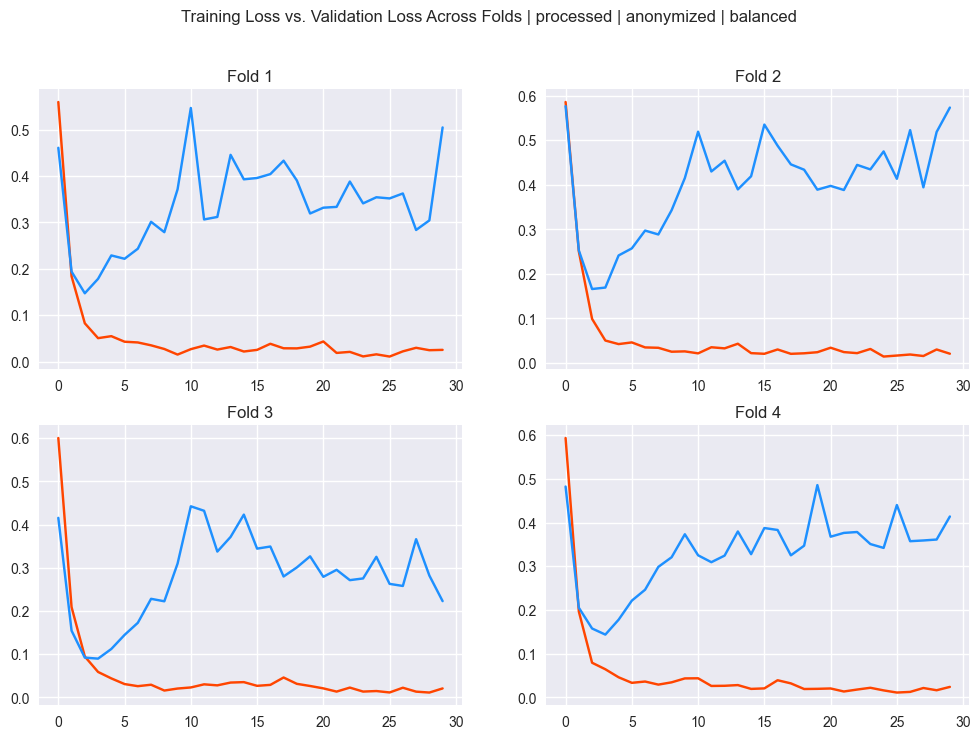

In [136]:
plotter.plot_subplots_curve(all_losses_8, all_val_losses_8, "Training Loss vs. Validation Loss Across Folds | processed | anonymized | balanced")

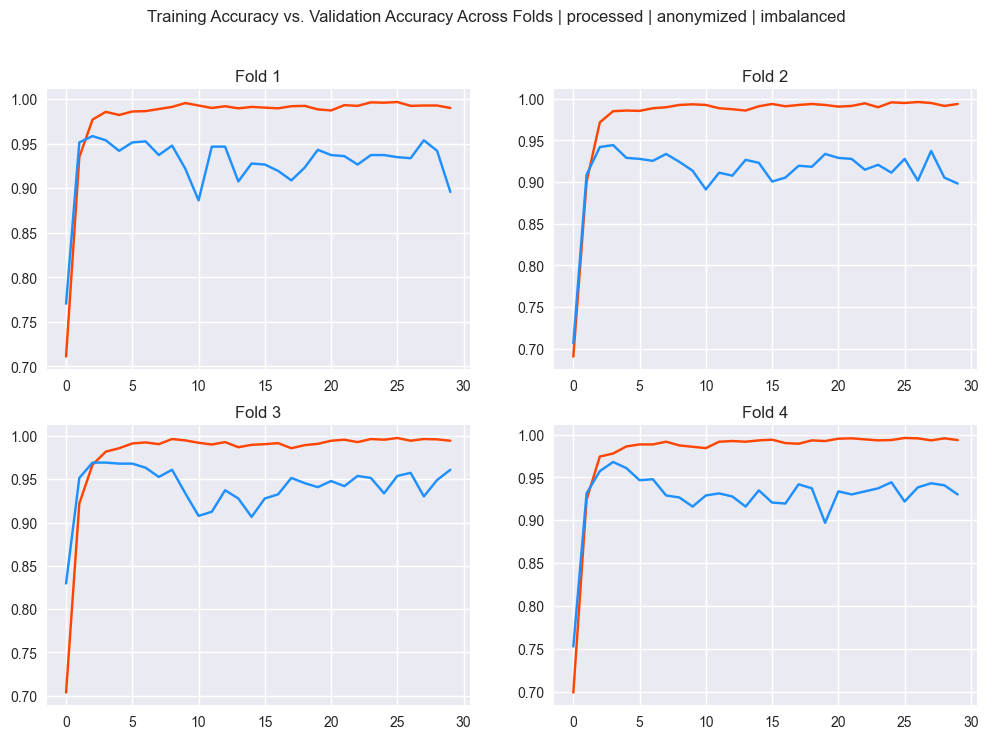

In [137]:
plotter.plot_subplots_curve(all_accuracies_8, all_val_accuracies_8, "Training Accuracy vs. Validation Accuracy Across Folds | processed | anonymized | imbalanced")

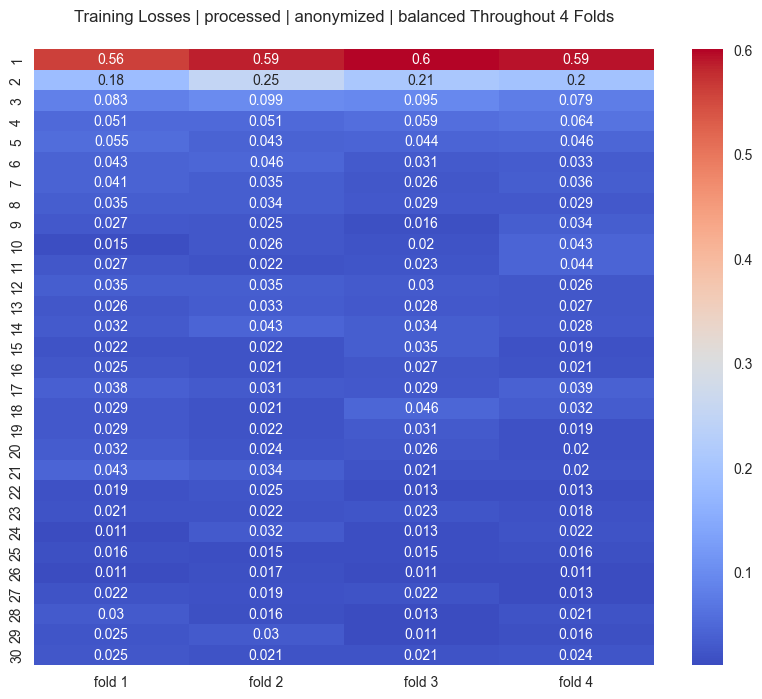

In [138]:
plotter.plot_heatmap(all_losses_8, "Training Losses | processed | anonymized | balanced")

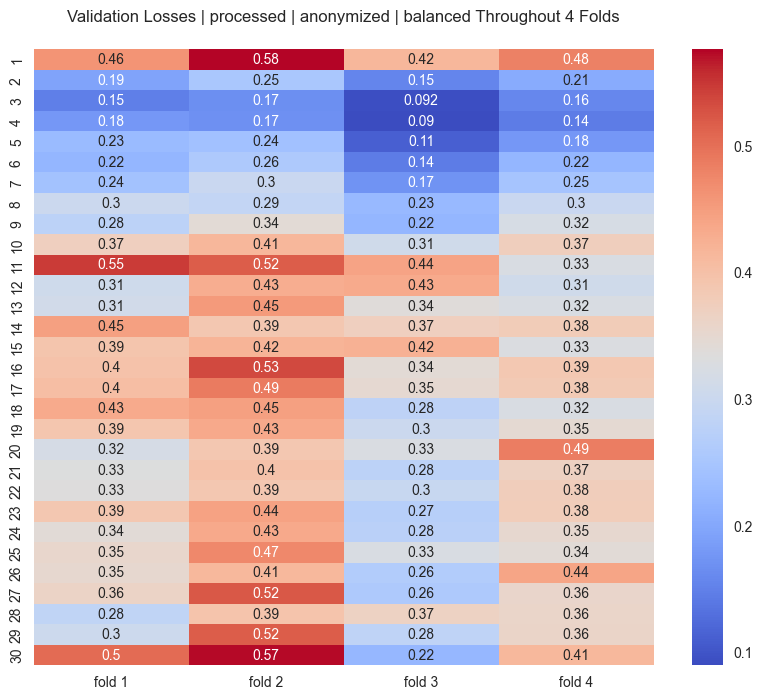

In [139]:
plotter.plot_heatmap(all_val_losses_8, "Validation Losses | processed | anonymized | balanced")

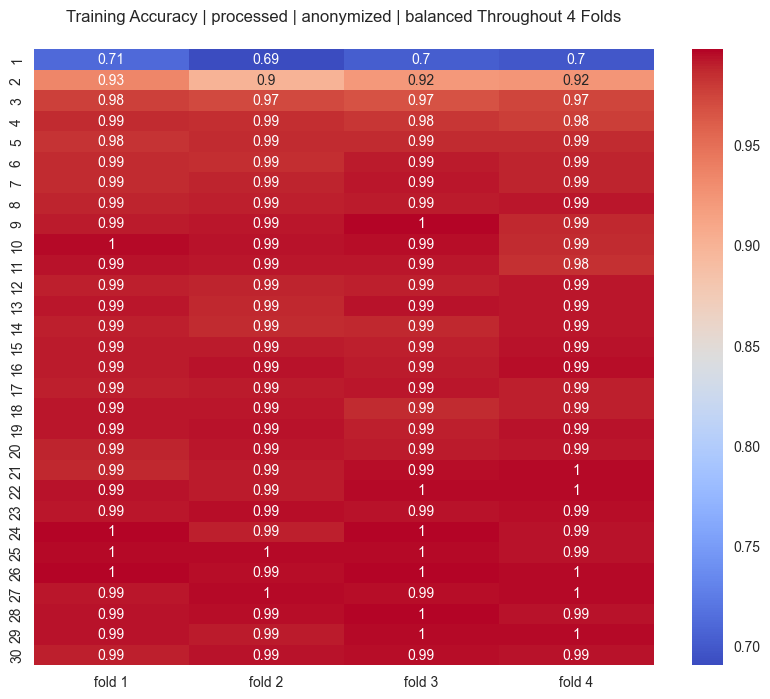

In [140]:
plotter.plot_heatmap(all_accuracies_8, "Training Accuracy | processed | anonymized | balanced")

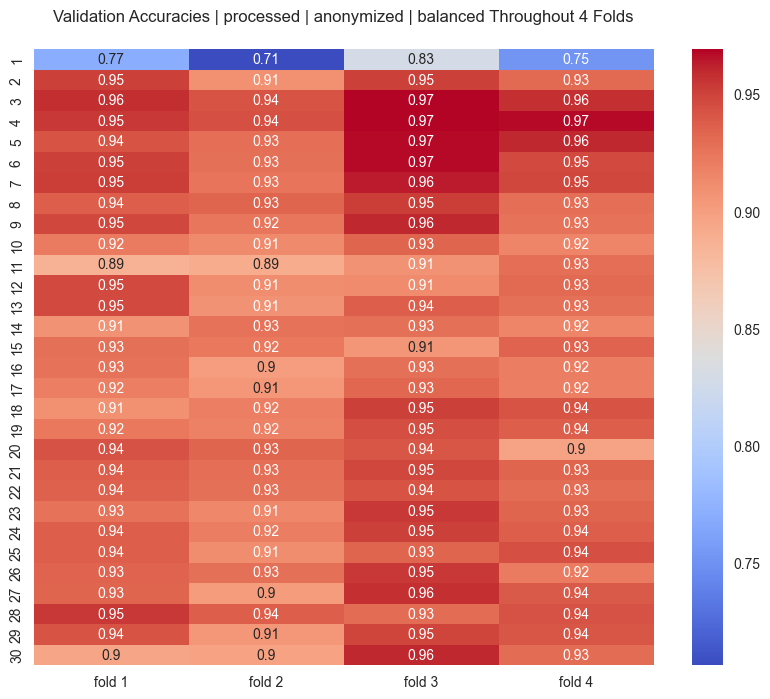

In [141]:
plotter.plot_heatmap(all_val_accuracies_8, "Validation Accuracies | processed | anonymized | balanced")

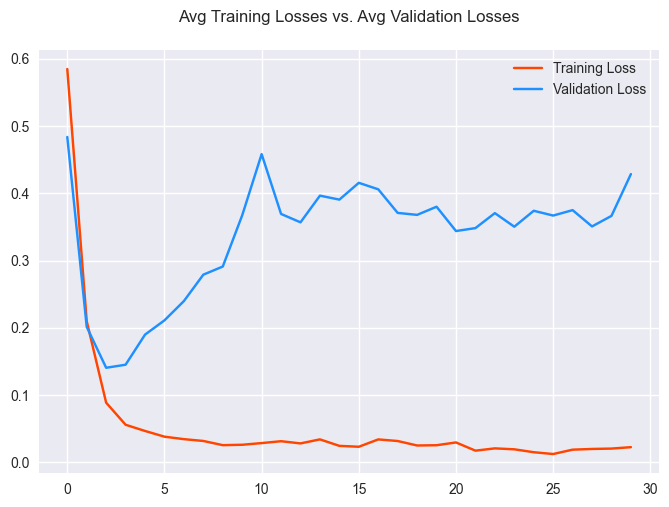

In [142]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_8, avg_val_loss_hist_8, "Training Loss", "Validation Loss")

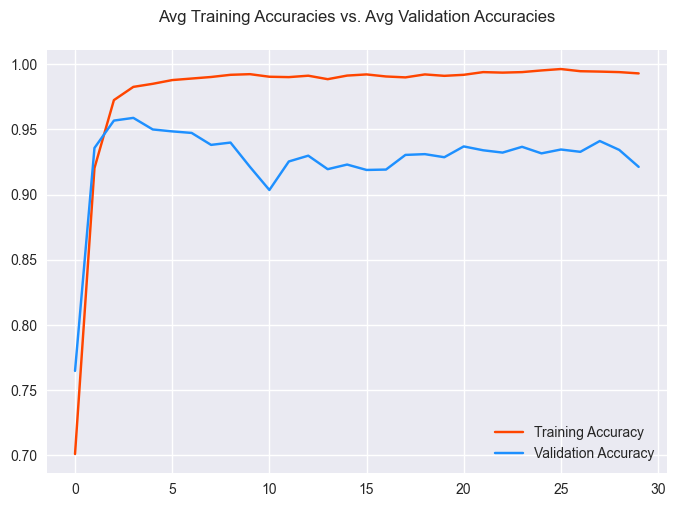

In [143]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_8, avg_val_acc_hist_8, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 1s 9ms/step


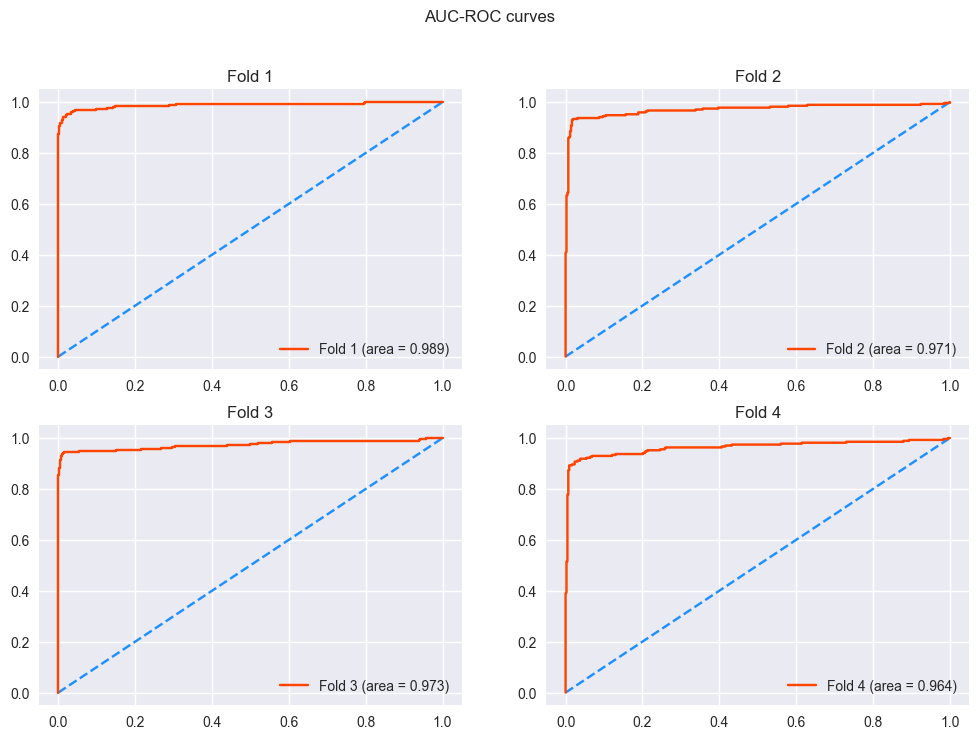

In [144]:
plotter.plot_roc_curve(all_models_8, X_test_vectors_8, y_test)

22/22 [==============================] - 0s 8ms/step


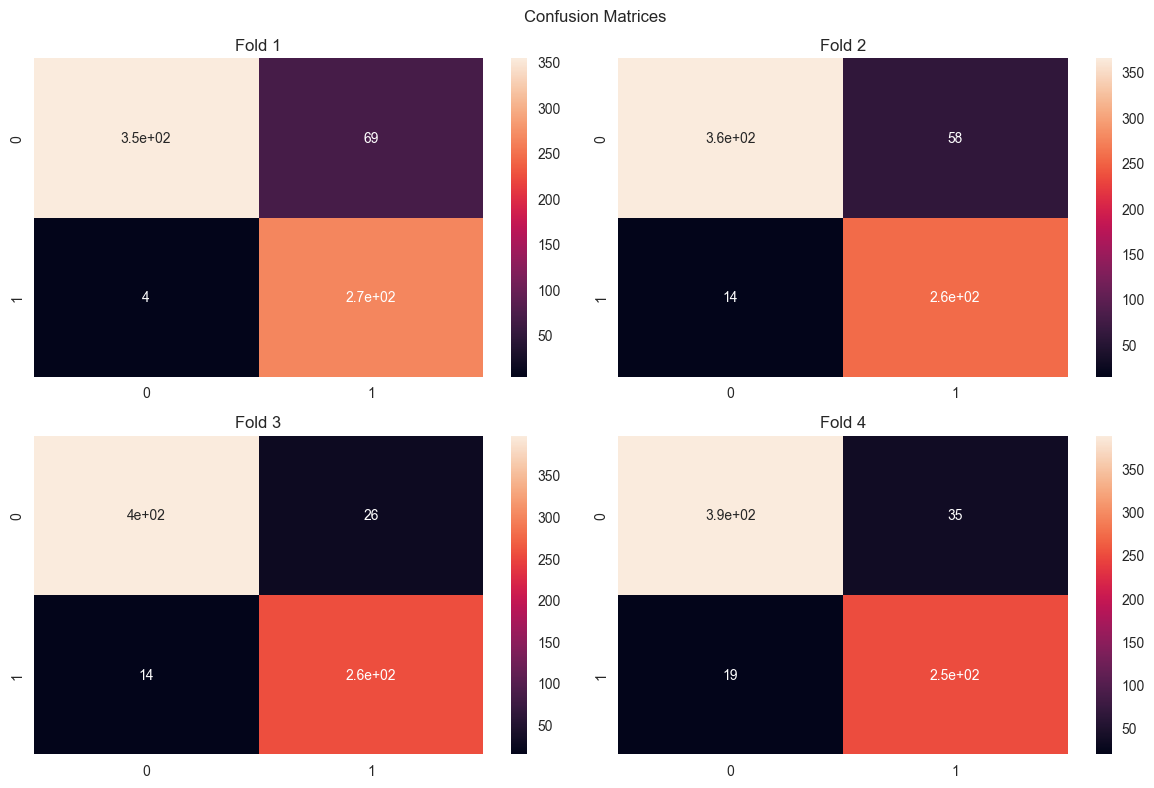

In [145]:
plotter.plot_confusion_matrix(all_models_8, X_test_vectors_8, y_test)

In [146]:
for i, trained_model in enumerate(all_models_8):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_8, y_test))

Model 1:
22/22 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       423
           1       0.79      0.99      0.88       270

    accuracy                           0.89       693
   macro avg       0.89      0.91      0.89       693
weighted avg       0.91      0.89      0.90       693

Model 2:
22/22 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       423
           1       0.82      0.95      0.88       270

    accuracy                           0.90       693
   macro avg       0.89      0.91      0.89       693
weighted avg       0.91      0.90      0.90       693

Model 3:
22/22 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       423
           1       0.91      0.95      0.93       2

In [147]:
print_testing_loss_accuracy(all_models_8, X_test_vectors_8, y_test)

model: 1
22/22 [==============================] - 0s 9ms/step - loss: 0.4265 - accuracy: 0.8947
model: 2
22/22 [==============================] - 0s 9ms/step - loss: 0.5096 - accuracy: 0.8961
model: 3
22/22 [==============================] - 0s 9ms/step - loss: 0.3021 - accuracy: 0.9423
model: 4
22/22 [==============================] - 0s 9ms/step - loss: 0.4223 - accuracy: 0.9221
average testing loss: 0.415
average testing accuracy: 0.914


### Saving Best Combination
There are 2 similar combinations which are: combination 3 (no preprocessing - anonymization - imbalance) and combination 4 (no preprocessing - anonymization - balanced). Each of them has 4 results depending on the folds. As a final result, the best model generalizing well on testing data with the highest testing accuracy is **the fourth model of the third combination** with **0.972** testing accuracy and **0.141** testing loss.

In [150]:
all_models_3[3].save("models/best_tfidf_model.h5")